# Team 16 USA accidents
**Data sicience project report**

**Data Issues:**
- nulls in working zones and other tables which are none -> convert to right format
- create fake nulls and fix for them
- missing and nonsense values like hour 99 to be unkown
- inconsistancy & ambigious data


**columns with the issues:**
- workzone : 1. too many unkowns 2. incorrect nulls
- hour of the day: 99 hour - 250 record (drop)
- fake null across all columns (fix for)

***Reading Data-Set***


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

file_path = "/content/accident_2016_clean - accident_2016_clean - accident_2016_clean - accident_2016_clean.csv"
df_main = pd.read_csv(file_path)
df_main.head()

,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
0,56,Wyoming,560099,1,1,0,0,0,1,1,...,88,0,NaN,0,NaN,0,NaN,1,0,2016-12-04 03:45:00+00:00
1,16,Idaho,160226,1,1,0,0,0,3,3,...,99,0,NaN,0,NaN,0,NaN,2,0,2016-12-16 16:33:00+00:00
2,5,Arkansas,50006,1,1,0,0,0,2,2,...,99,20,Police-Pursuit-Involved (Since 1994),0,NaN,0,NaN,1,0,2016-01-06 03:36:00+00:00
3,48,Texas,482027,1,1,0,0,0,5,5,...,35,0,NaN,0,NaN,0,NaN,1,0,2016-08-07 15:28:00+00:00
4,12,Florida,121570,1,1,0,0,0,5,5,...,99,0,NaN,0,NaN,0,NaN,1,0,2016-07-21 19:37:00+00:00


# Cleaning


***Loading scrapped data to be merged***

**Dropping irrelevant columns**

In [ ]:

# Create the data dictionary
#data_dict = pd.DataFrame({
#    'Column Name': df.columns,
#    'Data Type': [df[col].dtype for col in df.columns],
#    'Unique Values': [df[col].nunique() for col in df.columns],
#    'Missing Values': [df[col].isnull().sum() for col in df.columns],
#    'Sample Values': [df[col].unique() for col in df.columns]  # First 5 unique values
#})

# Save or display the data dictionary
#print(data_dict)
# Or save to a file
#data_dict.to_csv('data_dictionary.csv', index=False)
#from google.colab import files
#files.download('data_dictionary.csv')


In [ ]:
df_main.drop([
    "national_highway_system",
    "trafficway_identifier",
    "trafficway_identifier_2",
    "milepoint",
    "special_jurisdiction",
    "special_jurisdiction_name",
    "atmospheric_conditions_1",
    "atmospheric_conditions_1_name",
    "atmospheric_conditions_2",
    "atmospheric_conditions_2_name",
    "rail_grade_crossing_identifier",
    "county",
    "city",
    "consecutive_number",
    "ownership",
    "longitude",
    "latitude",
    "related_factors_crash_level_1",
    "related_factors_crash_level_1_name",
    "related_factors_crash_level_2",
    "related_factors_crash_level_2_name",
    "related_factors_crash_level_3",
    "related_factors_crash_level_3_name"
], axis=1, inplace=True)

values = df_main.columns.to_list()
records_size = len(df_main)

print(values)
print(records_size)
num_columns = df_main.shape[1]
print("Number of columns:", num_columns)

['state_number', 'state_name', 'number_of_vehicle_forms_submitted_all', 'number_of_motor_vehicles_in_transport_mvit', 'number_of_parked_working_vehicles', 'number_of_forms_submitted_for_persons_not_in_motor_vehicles', 'number_of_persons_not_in_motor_vehicles_in_transport_mvit', 'number_of_persons_in_motor_vehicles_in_transport_mvit', 'number_of_forms_submitted_for_persons_in_motor_vehicles', 'day_of_crash', 'month_of_crash', 'year_of_crash', 'day_of_week', 'hour_of_crash', 'minute_of_crash', 'land_use', 'land_use_name', 'functional_system', 'functional_system_name', 'ownership_name', 'route_signing', 'route_signing_name', 'first_harmful_event', 'first_harmful_event_name', 'manner_of_collision', 'manner_of_collision_name', 'relation_to_junction_within_interchange_area', 'relation_to_junction_specific_location', 'relation_to_junction_specific_location_name', 'type_of_intersection', 'work_zone', 'relation_to_trafficway', 'relation_to_trafficway_name', 'light_condition', 'light_condition_n

**Cleaning nans and redundant values such as UNKNOWS and not reported, etc..**

In [ ]:
replace_vals = ["Work Zone, Type Unknown", "Construction", "Maintenance", "Utility"]
df_main['work_zone'] = df_main['work_zone'].replace(replace_vals, "Work-Zone").fillna("Not Work-Zone")

del_vals = ['Trafficway Not in State Inventory', 'Unknown', 'Not Reported']
df_main['land_use_name'] = df_main['land_use_name'].replace(del_vals, "N/A")

df_main = df_main[df_main["hour_of_crash"] <= 23]
df_main = df_main[df_main["minute_of_crash"] <= 59]

irrelevants = [96, 98, 99]
df_main["functional_system"] = df_main["functional_system"].replace(irrelevants, "N/A")

df_main['timestamp_of_crash'] = pd.to_datetime(df_main['timestamp_of_crash'])
df_main['timestamp_of_crash_UTC'] = df_main['timestamp_of_crash'].dt.strftime('%Y-%m-%d %H:%M')
df_main.drop(["timestamp_of_crash"], axis=1, inplace=True)
df_main['timestamp_of_crash_UTC'] = pd.to_datetime(df_main['timestamp_of_crash_UTC'])

ambiguous_values = ['', ' ', 'NA', 'N/A', 'UNKNOWN', 'Unknown', 'Not reported', 'None']
df_main['type_of_intersection'] = df_main['type_of_intersection'].replace(ambiguous_values, np.nan).fillna("N/A")
df_main['route_signing_name'] = df_main['route_signing_name'].replace(ambiguous_values, np.nan).fillna("N/A")

fake_nulls = ["Unknown", "Not Reported", "Other"]
df_main['ownership_name'] = df_main['ownership_name'].replace(fake_nulls, np.nan).fillna("N/A")
df_main['manner_of_collision_name'] = df_main['manner_of_collision_name'].replace(fake_nulls, np.nan).fillna("N/A")

clean_hours = ["hour_of_notification","hour_of_arrival_at_scene"]
clean_minute = ["minute_of_notification","minute_of_arrival_at_scene"]
df_main[clean_hours] = df_main[clean_hours].mask(df_main[clean_hours] > 23, np.nan)
df_main[clean_hours] = df_main[clean_hours].fillna(df_main[clean_hours].median())
df_main[clean_minute] = df_main[clean_minute].mask(df_main[clean_minute] > 59, np.nan)
df_main[clean_minute] = df_main[clean_minute].fillna(df_main[clean_minute].median())

arrival_minutes = df_main["hour_of_arrival_at_scene"] * 60 + df_main["minute_of_arrival_at_scene"]
notification_minutes = df_main["hour_of_notification"] * 60 + df_main["minute_of_notification"]
df_main["EMS_Response_Time"] = arrival_minutes - notification_minutes
df_main["EMS_Response_Time"] = np.where(df_main["EMS_Response_Time"] < 0, df_main["EMS_Response_Time"] + 1440, df_main["EMS_Response_Time"])

df_main["number_of_persons_in_accidents"] = df_main["number_of_persons_in_motor_vehicles_in_transport_mvit"] + df_main["number_of_persons_not_in_motor_vehicles_in_transport_mvit"]

df_main["fatality_rate_Pct"] = (
    df_main["number_of_fatalities"] / (df_main["number_of_persons_in_motor_vehicles_in_transport_mvit"] + df_main["number_of_persons_not_in_motor_vehicles_in_transport_mvit"]) * 100
)


**Extracting Date again from timestamp_of_crash_UTC FOR SHOW**



In [ ]:
  # Convert to date to be able to extract
df_main['timestamp_of_crash_UTC'] = pd.to_datetime(df_main['timestamp_of_crash_UTC'])

  # Extract and create new columns
df_main['year_of_crash'] = df_main['timestamp_of_crash_UTC'].dt.year
df_main['month_of_crash'] = df_main['timestamp_of_crash_UTC'].dt.month
df_main['day_of_crash'] = df_main['timestamp_of_crash_UTC'].dt.day
df_main['hour_of_crash'] = df_main['timestamp_of_crash_UTC'].dt.hour
df_main['minute_of_crash'] = df_main['timestamp_of_crash_UTC'].dt.minute

  # Convert back to string
df_main['timestamp_of_crash_UTC'] = df_main['timestamp_of_crash_UTC'].dt.strftime('%Y-%m-%d %H:%M')

print(df_main[[
    'timestamp_of_crash_UTC',
    'year_of_crash', 'month_of_crash', 'day_of_crash',
    'hour_of_crash', 'minute_of_crash'
]].head().to_string())


  timestamp_of_crash_UTC  year_of_crash  month_of_crash  day_of_crash  hour_of_crash  minute_of_crash
0       2016-12-04 03:45           2016              12             4              3               45
1       2016-12-16 16:33           2016              12            16             16               33
2       2016-01-06 03:36           2016               1             6              3               36
3       2016-08-07 15:28           2016               8             7             15               28
4       2016-07-21 19:37           2016               7            21             19               37


***Changing names***

In [ ]:
short_names_harmful_event = {
    'Rollover/Overturn': 'Rollover',
    'Fire/Explosion': 'Fire',
    'Immersion (or Partial Immersion, Since 2012)': 'Immersion',
    'Fell/Jumped from Vehicle': 'Fell/Jumped',
    'Injured in Vehicle (Non-Collision)': 'Injured',
    'Other Non-Collision': 'Non-Collision',
    'Motor Vehicle in Transport': 'MotorVehicle',
    'Parked Motor Vehicle (Not In Transport)': 'ParkedVehicle',
    'Thrown or Falling Object': 'FallingObject',
    'Impact Attenuator/Crash Cushion': 'CrashCushion',
    'Bridge Pier or Support': 'BridgePier',
    'Bridge Rail (Includes Parapet)': 'BridgeRail',
    'Concrete Traffic Barrier': 'ConcreteBarrier',
    'Other Traffic Barrier': 'OtherBarrier',
    'Utility Pole/Light Support': 'UtilityPole',
    'Other Post, Other Pole, or Other Support': 'OtherPole',
    'Pavement Surface Irregularity (Ruts, Potholes, Grates, etc.)': 'PavementIssue',
    'Motor Vehicle In-Transport Strikes or is Struck by Cargo, Persons orObjects Set-in-Motion from/by Another Motor Vehicle In-Transport': 'VehicleCargo',
    'Ridden Animal or Animal-Drawn Conveyance (Since 1998)': 'AnimalConveyance',
    'Unknown': 'NA'
}

print(df_main['first_harmful_event_name'].unique())

['Rollover/Overturn' 'Fire/Explosion'
 'Immersion (or Partial Immersion, Since 2012)' 'Fell/Jumped from Vehicle'
 'Injured in Vehicle (Non-Collision)' 'Other Non-Collision' 'Pedestrian'
 'Pedalcyclist' 'Live Animal' 'Motor Vehicle in Transport'
 'Parked Motor Vehicle (Not In Transport)' 'Boulder'
 'Other Object (Not Fixed)' 'Impact Attenuator/Crash Cushion'
 'Bridge Pier or Support' 'Bridge Rail (Includes Parapet)'
 'Guardrail Face' 'Concrete Traffic Barrier' 'Other Traffic Barrier'
 'Utility Pole/Light Support' 'Other Post, Other Pole, or Other Support'
 'Culvert' 'Curb' 'Ditch' 'Embankment' 'Fence' 'Wall' 'Shrubbery'
 'Tree (Standing Only)' 'Other Fixed Object'
 'Pavement Surface Irregularity (Ruts, Potholes, Grates, etc.)'
 'Working Motor Vehicle' 'Traffic Signal Support' 'Snow Bank'
 'Bridge Overhead Structure' 'Jackknife (Harmful to This Vehicle)'
 'Guardrail End'
 'Motor Vehicle In-Transport Strikes or is Struck by Cargo, Persons orObjects Set-in-Motion from/by Another Motor Vehi

In [ ]:
short_names_trafficway = {
    'On Roadside': 'Roadside',
    'On Median': 'Median',
    'On Roadway': 'Roadway',
    'Outside Trafficway': 'OutsideWay',
    'Off Roadway – Location Unknown': 'OffRoadUnknown',
    'In Parking Lane/Zone (Since 2007)': 'ParkingZone',
    'Continuous Left-Turn Lane': 'LeftTurnLane',
    'Unknown': 'NA',
    'Not Reported': 'NA'
}
df_main['first_harmful_event_name'] = df_main['first_harmful_event_name'].replace(short_names_harmful_event)
df_main['relation_to_trafficway_name'] = df_main['relation_to_trafficway_name'].replace(short_names_trafficway)

print(df_main['relation_to_trafficway_name'].unique())

['Roadside' 'Median' 'Roadway' 'Separator' 'Gore' 'On Shoulder'
 'OutsideWay' 'NA' 'OffRoadUnknown' 'ParkingZone' 'LeftTurnLane']


In [ ]:
df_main.rename(columns={
    "number_of_vehicle_forms_submitted_all": "total_vehicle_forms_submitted",
    "number_of_motor_vehicles_in_transport_mvit": "motor_vehicles_in_transport",
    "number_of_parked_working_vehicles": "parked_working_vehicles",
    "number_of_forms_submitted_for_persons_not_in_motor_vehicles": "forms_for_non_motorized_persons",
    "number_of_persons_not_in_motor_vehicles_in_transport_mvit": "non_motorized_persons_in_transport",
    "number_of_persons_in_motor_vehicles_in_transport_mvit": "motor_vehicle_occupants",
    "number_of_forms_submitted_for_persons_in_motor_vehicles": "forms_for_motorized_persons",
    "relation_to_junction_within_interchange_area": "junction_relation_in_interchange"

}, inplace=True)

df_main['manner_of_collision_name'] = df_main['manner_of_collision_name'].replace(
    "Not Collision with Motor Vehicle in Transport (Not Necessarily in Transport for2005-2009)",
    "Not Collision with MVT"
)

df_main['functional_system_name'] = df_main['functional_system_name'].replace(
    "Principal Arterial – Other Freeways and Expressways",
    "Principal Arterial – Other Freeways"
)

**Renaming Columns and cleaning values**

Merging

Fixing feedback related issues

In [ ]:
import pandas as pd

print("INFO")
print(df_main.info(), "\n")
print("DESCRIBE")
print(df_main.describe().T, "\n")
print("HEAD")
print(df_main.head(), "\n")

INFO
<class 'pandas.core.frame.DataFrame'>
Index: 34494 entries, 0 to 34747
Data columns (total 50 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   state_number                                 34494 non-null  int64  
 1   state_name                                   34494 non-null  object 
 2   total_vehicle_forms_submitted                34494 non-null  int64  
 3   motor_vehicles_in_transport                  34494 non-null  int64  
 4   parked_working_vehicles                      34494 non-null  int64  
 5   forms_for_non_motorized_persons              34494 non-null  int64  
 6   non_motorized_persons_in_transport           34494 non-null  int64  
 7   motor_vehicle_occupants                      34494 non-null  int64  
 8   forms_for_motorized_persons                  34494 non-null  int64  
 9   day_of_crash                                 34494 non-null  int32  
 10

In [ ]:
dup_count = df_main.duplicated().sum()
print(f"Duplicate rows: {dup_count}")
if dup_count:
    df_main = df_main.drop_duplicates()
    print("Dropped duplicate rows.")


Duplicate rows: 0


In [ ]:
print("Missing per column:")
print(df_main.isna().sum(), "\n")


Missing per column:
state_number                                   0
state_name                                     0
total_vehicle_forms_submitted                  0
motor_vehicles_in_transport                    0
parked_working_vehicles                        0
forms_for_non_motorized_persons                0
non_motorized_persons_in_transport             0
motor_vehicle_occupants                        0
forms_for_motorized_persons                    0
day_of_crash                                   0
month_of_crash                                 0
year_of_crash                                  0
day_of_week                                    0
hour_of_crash                                  0
minute_of_crash                                0
land_use                                       0
land_use_name                                  0
functional_system                              0
functional_system_name                         0
ownership_name                                 0


In [ ]:
print("Final DataFrame shape:", df_main.shape)

Final DataFrame shape: (34494, 50)


In [ ]:
"""
# alien final data dictionary check

# Create the data dictionary
data_dict = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': [df[col].dtype for col in df.columns],
    'Unique Values': [df[col].nunique() for col in df.columns],
    'Missing Values': [df[col].isnull().sum() for col in df.columns],
    'Sample Values': [df[col].unique() for col in df.columns]  # First 5 unique values
})

# Save or display the data dictionary
print(data_dict)
# Or save to a file
data_dict.to_csv('data_dictionary.csv', index=False)
from google.colab import files
files.download('data_dictionary.csv')
"""


"\n# alien final data dictionary check\n\n# Create the data dictionary\ndata_dict = pd.DataFrame({\n    'Column Name': df.columns,\n    'Data Type': [df[col].dtype for col in df.columns],\n    'Unique Values': [df[col].nunique() for col in df.columns],\n    'Missing Values': [df[col].isnull().sum() for col in df.columns],\n    'Sample Values': [df[col].unique() for col in df.columns]  # First 5 unique values\n})\n\n# Save or display the data dictionary\nprint(data_dict)\n# Or save to a file\ndata_dict.to_csv('data_dictionary.csv', index=False)\nfrom google.colab import files\nfiles.download('data_dictionary.csv')\n"

# **Section1: Abstract**

## *Patterns of Fatal Crashes Based on Time and Environmental Factors*
### **Insight Question 1:**
Under which periods and environmental conditions do crashes peak, considering the effects of lighting and weather on crash severity?


***Analysis:***

### Visual 1: Fatal Crashes by Time, Lighting, and Weather

This set of heatmaps shows how time, lighting, and weather impact fatal crash rates.

- **Evenings (6 PM–10 PM)** and **early mornings** show the **highest fatal crash rates**, especially on **Sundays and Mondays** — likely due to weekend travel, fatigue, or return-to-work traffic.
- **Nighttime crashes in dark conditions** have much **higher fatality rates**, as shown in the lighting heatmap. Poor visibility increases crash severity.
- **Daytime crashes are more common**, but severity is worse in **low light**.
- **Fatalities also occur in clear weather**, likely due to high traffic volume. But **snow, fog, and cloudy weather** show high fatality rates too, mostly during the day.
- Overall, **lighting and time of day** are just as important as **weather** in determining how deadly a crash might be.

**Takeaway:** Bad visibility — whether from darkness or weather — is a major factor in fatal crash outcomes.


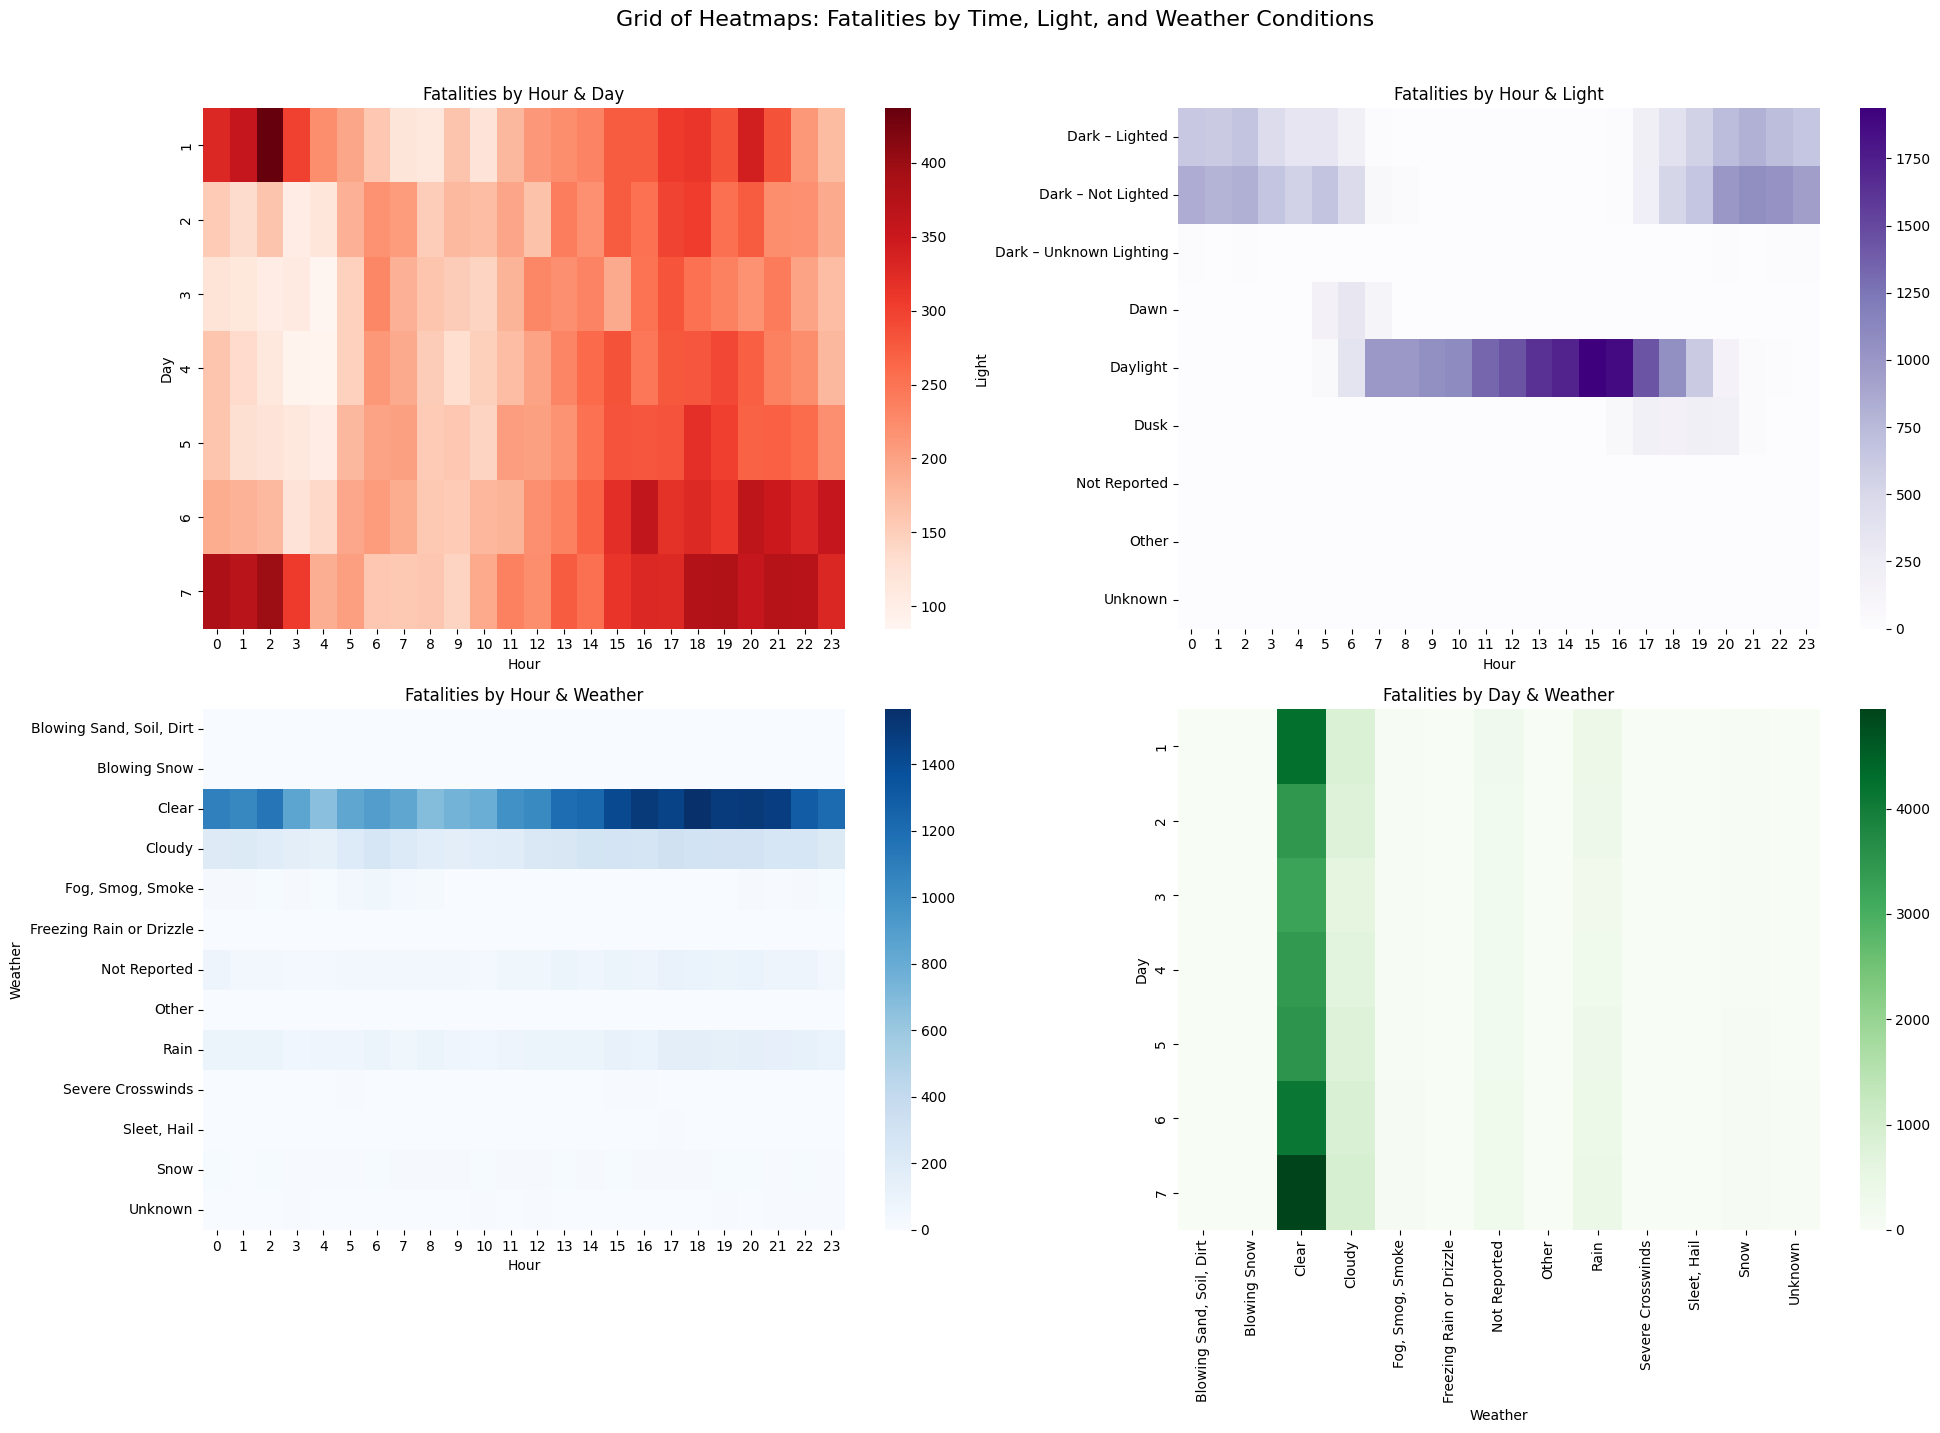

In [ ]:
# 2x2 visual setup
fig, axes = plt.subplots(2, 2, figsize=(20, 14))

# Heatmap 1
pivot1 = df_main.pivot_table(values='number_of_fatalities', index='day_of_week',
                        columns='hour_of_crash', aggfunc='sum', fill_value=0)
sns.heatmap(pivot1, cmap='Reds', ax=axes[0, 0])
axes[0, 0].set_title('Fatalities by Hour & Day')
axes[0, 0].set_xlabel('Hour')
axes[0, 0].set_ylabel('Day')

# Heatmap 2
pivot2 = df_main.pivot_table(values='number_of_fatalities', index='light_condition_name',
                        columns='hour_of_crash', aggfunc='sum', fill_value=0)
sns.heatmap(pivot2, cmap='Purples', ax=axes[0, 1])
axes[0, 1].set_title('Fatalities by Hour & Light')
axes[0, 1].set_xlabel('Hour')
axes[0, 1].set_ylabel('Light')

# Heatmap 3
pivot3 = df_main.pivot_table(values='number_of_fatalities', index='atmospheric_conditions_name',
                        columns='hour_of_crash', aggfunc='sum', fill_value=0)
sns.heatmap(pivot3, cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('Fatalities by Hour & Weather')
axes[1, 0].set_xlabel('Hour')
axes[1, 0].set_ylabel('Weather')

# Heatmap 4
pivot4 = df_main.pivot_table(values='number_of_fatalities', index='day_of_week',
                        columns='atmospheric_conditions_name', aggfunc='sum', fill_value=0)
sns.heatmap(pivot4, cmap='Greens', ax=axes[1, 1])
axes[1, 1].set_title('Fatalities by Day & Weather')
axes[1, 1].set_xlabel('Weather')
axes[1, 1].set_ylabel('Day')

# Add a centered title for the whole figure
fig.suptitle('Grid of Heatmaps: Fatalities by Time, Light, and Weather Conditions', fontsize=16, y=1.02)

# Layout adjustment
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Give space for suptitle
plt.show()


# **Section2: Roads and crashes:**

### *Trafficway and Junction Relation to Crash Severity*
#### **Insight Question 2:**
How does the proximity to junctions and the ownership of trafficways impact the severity of crashes in terms of fatalities?


***Anlaysis:***
#### Visual 2: Crash Severity by Location and Road Ownership

This visual explores how crash severity changes based on **junction type** and **who owns the road**.

- **Non-intersection locations** show **higher fatality rates** than intersections, likely due to lack of traffic signals or controls.
- **Interchanges** also have **high fatality rates**, probably due to complex traffic patterns and high speeds.
- **Railroad crossings** and **through highways** are rare but often **deadly** due to high-speed or high-impact crashes.

- **Driveway access and ramps** have **lower fatality rates**, likely due to slower speeds and more cautious driving.

- **State-owned roads** show both **high crash volumes and higher severity**, possibly due to faster travel and heavier usage.
- **City and county roads** have **moderate fatality rates**, likely benefiting from slower speeds and faster EMS response.
- **Federal and tribal roads** see **fewer crashes** but **higher severity**, possibly from remote locations and slower response times.

**Conclusion:** Crash severity is shaped not just by **location**, but also by **road ownership**, speed, traffic control, and access to emergency services.


In [ ]:
# Top 10 categories
df_use = df_main[df_main["ownership_name"].isin(df_main["ownership_name"].value_counts().head(10).index) & df_main["relation_to_junction_specific_location_name"].isin(df_main["relation_to_junction_specific_location_name"].value_counts().head(10).index)]

# Group and calculate fatality rate
grouped = df_use.groupby(["ownership_name", "relation_to_junction_specific_location_name"], as_index=False).agg(
    fatalities=("number_of_fatalities", "sum"),
    vehicles=("motor_vehicle_occupants", "sum")
)
grouped["rate"] = grouped["fatalities"] / grouped["vehicles"]

# Bubble chart
fig = px.scatter(grouped,
    x="ownership_name", y="relation_to_junction_specific_location_name",
    size="vehicles", color="rate", size_max=40,
    color_continuous_scale="Reds",
    labels={"ownership_name": "Ownership", "relation_to_junction_specific_location_name": "Junction",
            "vehicles": "Occupants", "rate": "Fatality Rate"},
    title="Fatality Rate by Ownership & Junction (Top 10)"
)

fig.update_traces(marker_line=dict(width=1, color="gray"))
fig.update_xaxes(tickangle=45)
fig.update_layout(width=950, height=550)
fig.show()



#### **Insight Question 3:**
Are fewer fatalities associated with faster Emergency Medical Services (EMS) response times, and is this relationship different depending on urban or rural location or lighting conditions?


**Analysis**

### Visual 3: Fatalities by Lighting, Land Use, and EMS Response Time

This visual explores how **lighting conditions**, **land use (urban/rural)**, and **EMS response time** relate to **fatal crash outcomes**.

- Most fatalities occur in **urban areas** with **short EMS response times (0–30 mins)** — not because fast EMS improves survival, but because **severe crashes happen in high-traffic zones** where EMS can respond quickly.
- **Rural areas** show **fewer fatalities** and **longer EMS times**, likely due to **lower traffic** and possibly **underreporting**.
- **Lighting matters**: deaths are highest in **daylight** (due to more road activity) and **dark-not-lighted** conditions (due to poor visibility), stressing the need for **better nighttime lighting**.
- As EMS response time increases, fatalities decrease — not due to better outcomes, but because **less severe crashes tend to happen in harder-to-reach areas**.

**Takeaway:** High fatality zones are often **urban**, during **daylight or dark-no-light conditions**, and where **crashes are severe enough to prompt quick EMS response**. This highlights the need


In [ ]:
# EMS time categorization
def ems_cat(t):
    if t <= 1: return "0-1 min"
    elif t <= 8: return "2-8 min"
    elif t <= 30: return "9-30 min"
    elif t <= 60: return "31-60 min"
    elif t <= 120: return "1-2 hrs"
    elif t <= 240: return "2-4 hrs"
    elif t <= 840: return "4-14 hrs"
    else: return "14-24 hrs"

df_main["EMS_Category"] = df_main["EMS_Response_Time"].apply(ems_cat)
cat_order = ["0-1 min", "2-8 min", "9-30 min", "31-60 min", "1-2 hrs", "2-4 hrs", "4-14 hrs", "14-24 hrs"]
df_main["EMS_Category"] = pd.Categorical(df_main["EMS_Category"], categories=cat_order, ordered=True)

# Light Condition
light = df_main.groupby(["EMS_Category", "light_condition_name"]).sum(numeric_only=True).reset_index()
light["view"] = "Light Condition"
light.rename(columns={"light_condition_name": "category"}, inplace=True)

# Land Use
land = df_main.groupby(["EMS_Category", "land_use_name"]).sum(numeric_only=True).reset_index()
land["view"] = "Land Use"
land.rename(columns={"land_use_name": "category"}, inplace=True)
land["category"] = land["category"].replace({ "N/A": "Other","Unknown": "Other",
                                             "Other": "Other","Not Reported": "Other"})

# Combine
combined = pd.concat([light, land])

# Custom colors
custom_colors = { "Urban": "#e74c3c","Rural": "#3498db","Other": "#95a5a6"}

# Plot
fig = px.scatter(
    combined,
    x="EMS_Category",
    y="number_of_fatalities",
    size="number_of_fatalities",
    color="category",
    facet_col="view",
    size_max=50,
    color_discrete_map=custom_colors,
    labels={"EMS_Category": "EMS Response Time", "number_of_fatalities": "Number of Fatalities","category": "Group"},
    title="Fatalities vs EMS Response Time"
)

fig.update_layout(
    title_x=0.5,
    height=550,
    margin=dict(t=60, l=40, r=40, b=40),
    legend_title="Group"
)
fig.update_xaxes(tickangle=-30)
fig.show()


<ipython-input-417-731fdee2e247>:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-417-731fdee2e247>:22: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## Correlation of the EMS and Junction:

### **Insight Question 4:**
How does the EMS change based on the road type in the case of a junction?


***Analysis:***
### Visual 4: EMS Response Time vs Junction Type (Rural vs Urban)

This chart compares EMS response times by junction type and land use (urban vs rural). On the left, we see the top 3 junctions with the longest average response times — rural **Acceleration/Deceleration Lanes** are crazy high (~700 mins), likely due to being hard to reach.

**Railway Crossings** and **Interchange Areas** in rural zones also take longer, but not as extreme.

On the right side, more common junctions (like **Intersections** and **Driveways**) still show rural areas having longer EMS times than urban ones.

**TL;DR:** Rural areas always take longer, especially in weird or remote junctions. Better EMS coverage in those places = more lives saved.



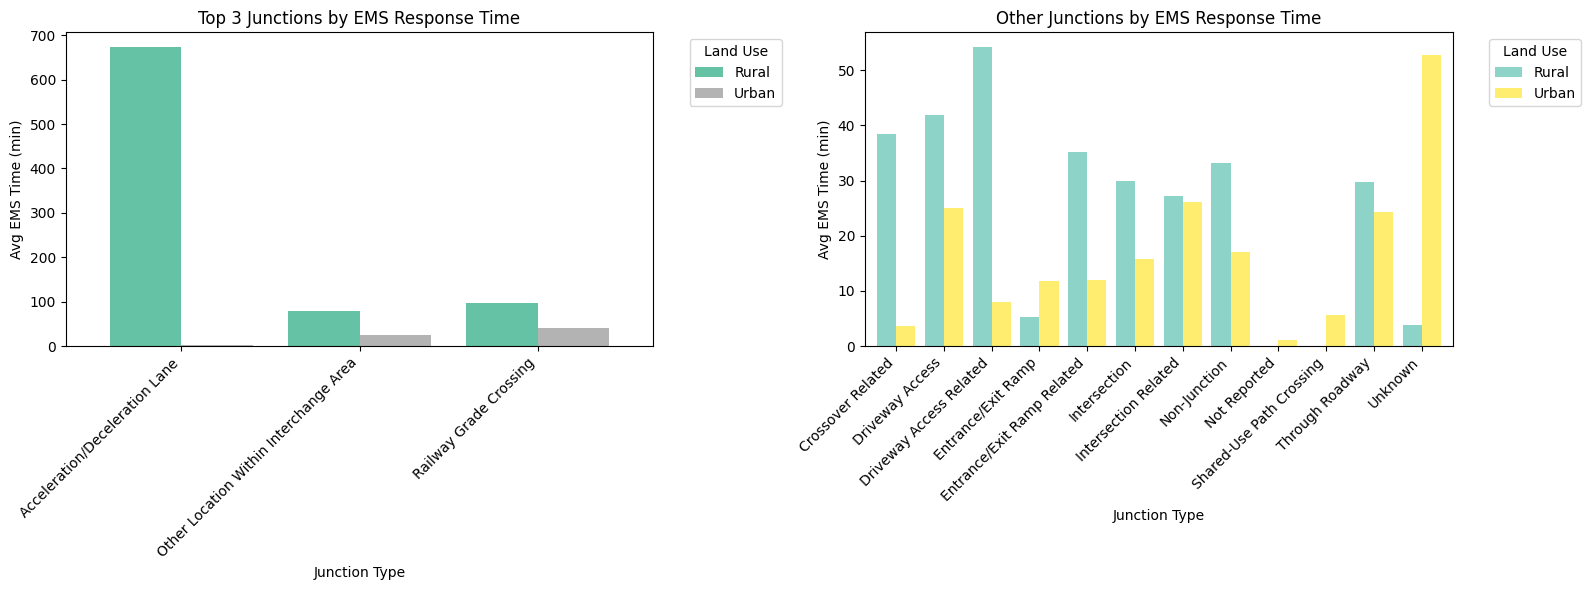

In [ ]:
# Filter out N/A values
df_filtered = df_main[(df_main['relation_to_junction_specific_location_name'] != 'N/A') &
                      (df_main['land_use_name'] != 'N/A')]

# Avg EMS response by junction type
junction_avg = df_filtered.groupby('relation_to_junction_specific_location_name')['EMS_Response_Time'].mean()
top3 = junction_avg.sort_values(ascending=False).head(3).index
rest = junction_avg.drop(top3).index

# Pivot tables
top3_pivot = df_filtered[df_filtered['relation_to_junction_specific_location_name'].isin(top3)] \
    .groupby(['relation_to_junction_specific_location_name', 'land_use_name'])['EMS_Response_Time'] \
    .mean().unstack(fill_value=0)

rest_pivot = df_filtered[df_filtered['relation_to_junction_specific_location_name'].isin(rest)] \
    .groupby(['relation_to_junction_specific_location_name', 'land_use_name'])['EMS_Response_Time'] \
    .mean().unstack(fill_value=0)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

top3_pivot.plot(kind='bar', ax=ax1, cmap='Set2', width=0.8)
ax1.set_title('Top 3 Junctions by EMS Response Time', fontsize=12)
ax1.set_xlabel('Junction Type')
ax1.set_ylabel('Avg EMS Time (min)')
ax1.legend(title='Land Use', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

rest_pivot.plot(kind='bar', ax=ax2, cmap='Set3', width=0.8)
ax2.set_title('Other Junctions by EMS Response Time', fontsize=12)
ax2.set_xlabel('Junction Type')
ax2.set_ylabel('Avg EMS Time (min)')
ax2.legend(title='Land Use', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


### ***Influence of Work Zones on Collision Severity & Type***
#### **Insight Question 5:**
How does the fatality rate change during specific hours of the day in work zones compared to non-working zones?

***Analysis:***

### Visual 5: Avg Fatality Rate by Crash Hour (Work Zones vs Non-Work Zones)

This visual compares fatality rates by hour for crashes **inside** vs **outside** work zones.

Non-work zone crashes have **higher fatality rates**, especially between **12 AM and 4 AM** — likely due to low visibility, fewer patrols, and drunk/drowsy drivers.

Work zone crashes are generally **less fatal**, but still peak between **7 PM and 10 PM**, possibly from end-of-day fatigue or distraction.

**Bottom line:** Time of day matters. Night crashes in non-work zones are the deadliest. Targeting road safety at night = fewer severe crashes.


In [ ]:
# Split work zone vs non-work zone
df_work = df_main[df_main['work_zone'] == "Work-Zone"]
df_non = df_main[df_main['work_zone'] == "Not Work-Zone"].sample(n=len(df_work), random_state=42)

df_sample = pd.concat([df_work, df_non])

# Group for average fatality rate by hour and zone
avg_rate = df_sample.groupby(['hour_of_crash', 'work_zone'])['fatality_rate_Pct'].mean().reset_index()

# Plot
fig = px.bar(
    avg_rate,
    x="hour_of_crash",
    y="fatality_rate_Pct",
    color="work_zone",
    barmode="group",
    labels={
        "hour_of_crash": "Crash Hour",
        "fatality_rate_Pct": "Avg Fatality Rate (%)",
        "work_zone": "Zone"
    },
    title="Avg Fatality Rate by Crash Hour & Work Zone"
)

fig.update_layout(title_x=0.5,legend_title="Work Zone")

fig.show()


# **Section3: Behavioral**

**Analysis**
### Visual 6: State-Wise Traffic Analysis (Drunk Driving, Fatality, Crashes, EMS Time)

This set of four maps compares states across: **drunk driving**, **fatality severity**, **crash count**, and **EMS response time**.

- **Texas, California, and Florida** stand out with **high crash numbers** and **high drunk driving incidents** — likely due to large populations and dense traffic. The overlap suggests drunk driving is a key factor in crash frequency.

- **North Dakota and Iowa** don’t have as many crashes but show **high fatality severity**, possibly from **rural road speeds** or **long distances to trauma centers**.

- **Mississippi** shows **long EMS response times** and is in a region with **high fatality rates** — slower emergency help may worsen outcomes even when crash numbers are lower.

**Takeaway:** It's not just about how often crashes happen — **response time**, **driver behavior**, and **severity** all shape outcomes. Improving EMS access and reducing risky behaviors like drunk driving are just as vital as reducing crashes.


***Description6:***

In [ ]:
df_by_state = df_main.groupby('state_name', as_index=False).agg({
    'number_of_drunk_drivers': 'sum',
    'fatality_rate_Pct': 'mean',
    'number_of_persons_in_accidents': 'sum',
    'EMS_Response_Time': 'mean'
})

state_abbrev = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR",
    "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE",
    "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID",
    "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", "Kansas": "KS",
    "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD",
    "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS",
    "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV",
    "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY",
    "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
    "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT",
    "Vermont": "VT", "Virginia": "VA", "Washington": "WA", "West Virginia": "WV",
    "Wisconsin": "WI", "Wyoming": "WY"
}

df_by_state['state_abbrev'] = df_by_state['state_name'].map(state_abbrev)

fig = make_subplots(
    rows=2, cols=2,
    specs=[
        [{"type": "choropleth"}, {"type": "choropleth"}],
        [{"type": "choropleth"}, {"type": "choropleth"}]
    ],
    subplot_titles=[
        "Highest Drunk Drivers",
        "Highest Fatality Severity",
        "Highest Number of Crashes",
        "Highest EMS Times"
    ]
)

trace1 = go.Choropleth(
    locations=df_by_state['state_abbrev'],
    z=df_by_state['number_of_drunk_drivers'],
    locationmode="USA-states",
    colorscale="Reds",
    colorbar=dict(
        title="Drunk Drivers",
        x=0.05,
        y=0.65,
        len=0.3
    )
)
fig.add_trace(trace1, row=1, col=1)

trace2 = go.Choropleth(
    locations=df_by_state['state_abbrev'],
    z=df_by_state['fatality_rate_Pct'],
    locationmode="USA-states",
    colorscale="Blues",
    colorbar=dict(
        title="Fatality Rate (%)",
        x=0.47,
        y=0.65,
        len=0.3
    )
)
fig.add_trace(trace2, row=1, col=2)

trace3 = go.Choropleth(
    locations=df_by_state['state_abbrev'],
    z=df_by_state['number_of_persons_in_accidents'],
    locationmode="USA-states",
    colorscale="Greens",
    colorbar=dict(
        title="Crashes",
        x=0.05,
        y=0.15,
        len=0.3
    )
)
fig.add_trace(trace3, row=2, col=1)

trace4 = go.Choropleth(
    locations=df_by_state['state_abbrev'],
    z=df_by_state['EMS_Response_Time'],
    locationmode="USA-states",
    colorscale="Purples",
    colorbar=dict(
        title="EMS (min)",
        x=0.47,
        y=0.15,
        len=0.3
    )
)
fig.add_trace(trace4, row=2, col=2)

fig.update_layout(
    title_text="State Wise Analysis of Traffic Accidents and Severity (2×2 Grid)",
    margin=dict(l=50, r=50, t=100, b=50)
)

fig.update_geos(scope="usa", row=1, col=1)
fig.update_geos(scope="usa", row=1, col=2)
fig.update_geos(scope="usa", row=2, col=1)
fig.update_geos(scope="usa", row=2, col=2)

fig.show()


## ***Trend in Alcohol-Related Collisions Based on Road Types and Time of the Day***
#### **Insight Question7:**
How do alcohol-related collision densities change depending on the kind of road and time of the day?


**Analysis:**

### Visual 7: Alcohol-Related Crashes by Hour and Road Type

This heatmap shows how alcohol-involved crashes vary by **time of day** and **road type**.

- **Biggest spike** is between **12 AM – 3 AM**, especially on **Principal Arterial – Other** roads (200+ crashes at 2 AM). Likely tied to bar closing hours and late-night drinking.
- There’s a **second peak** from **4 PM – 8 PM**, possibly from post-work drinking and evening traffic, mainly on **Minor Arterials** and **Major Collectors**.
- **Morning hours (6 AM – 12 PM)** have the **lowest crash counts**, probably due to low alcohol consumption and more police presence.
- **Principal Arterials** consistently have the **highest crash counts**, followed by **Minor Arterials** and **Major Collectors** — all higher-speed roads.
- **Local roads and Minor Collectors** see fewer crashes, likely due to lower speeds and more controlled traffic.

**Takeaway:** Alcohol crashes peak late at night and on fast, busy roads. Slower, smaller roads are safer — time and road type both matter.


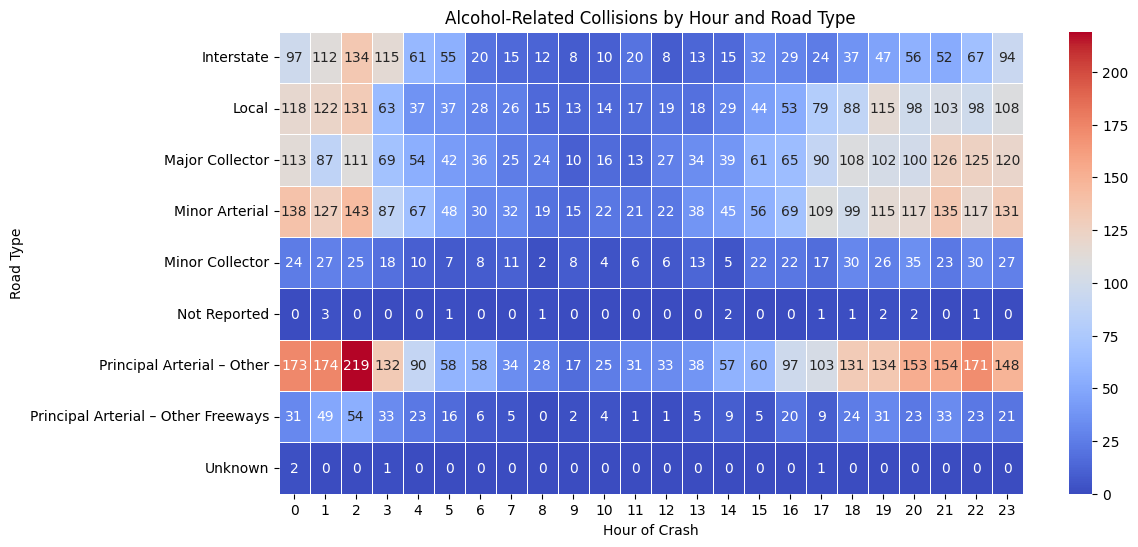

In [ ]:
# the count of alcohol-related collisions per hour and road type
alcohol_counts = df_filtered[df_filtered['number_of_drunk_drivers'] > 0].groupby(
    ['hour_of_crash', 'functional_system_name']
).size().reset_index(name='alcohol_related_count')

pivot_table = alcohol_counts.pivot(index="functional_system_name", columns="hour_of_crash", values="alcohol_related_count").fillna(0)

# make the visual
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

plt.title("Alcohol-Related Collisions by Hour and Road Type")
plt.xlabel("Hour of Crash")
plt.ylabel("Road Type")

plt.show()


# **Section4: Accident outcomes**

### ***Type of Collision and Its Effect on the Fatality Severity***
#### **Insight Question 8:**
How does the type of collision correlate to the severity of the crash?

***Analysis:***

### Visual 8: Fatality Rate by Collision Type

This bar chart shows which types of crashes are most likely to be fatal.

- **No-motor-vehicle crashes** (e.g. pedestrian or fixed-object) have the **highest fatality rate (~70%)**, likely due to lack of protection.
- **Front-to-front** and **N/A** collisions follow (~45%). Head-on crashes are high-impact. N/A might reflect missing data from severe, complex accidents.
- **Angle, front-to-rear, and sideswipes** sit in the middle (~35–40%) — dangerous, but usually less forceful than head-on crashes.
- **Rear-to-rear collisions** have the **lowest fatality rate**, which makes sense as they’re rare and low-impact.

**Conclusion:** The type of collision matters a lot — crashes involving vulnerable users or high direct impact are far more deadly.


<ipython-input-422-fbc1eea5c2f7>:12: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Not Collision with MVT'),
  Text(1, 0, 'N/A'),
  Text(2, 0, 'Front-to-Front'),
  Text(3, 0, 'Other (End-Swipes and Others)'),
  Text(4, 0, 'Angle'),
  Text(5, 0, 'Front-to-Rear'),
  Text(6, 0, 'Sideswipe – Same Direction'),
  Text(7, 0, 'Sideswipe – Opposite Direction'),
  Text(8, 0, 'Rear-to-Side'),
  Text(9, 0, 'Rear-to-Rear')])

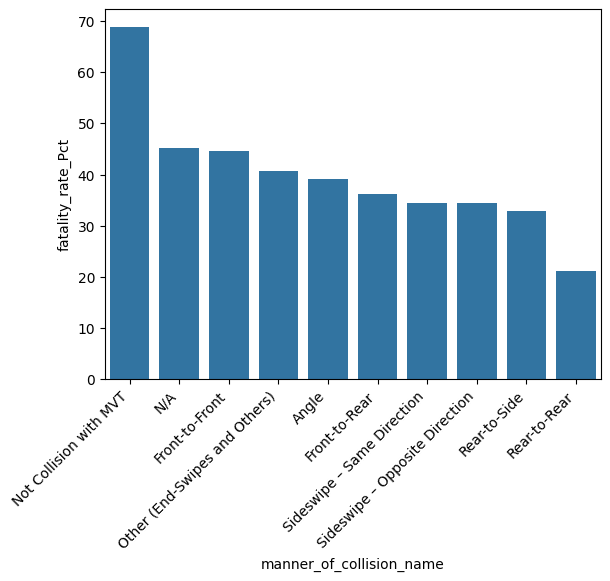

In [ ]:
# Calculate means for each collision type
means = df_main.groupby('manner_of_collision_name')['fatality_rate_Pct'].mean().sort_values(ascending=False)

# Convert to categorical
df_main['manner_of_collision_name'] = pd.Categorical(
    df_main['manner_of_collision_name'],
    categories=means.index,
    ordered=True
)

# make the plot
sns.barplot(data=df_main, x='manner_of_collision_name', y='fatality_rate_Pct', ci=None)
plt.xticks(rotation=45, ha='right')


### ***Type of Harmful Event and Its Effect on the Fatality Rate***
#### **Insight Question 9:**
Are crashes involving school buses more likely to result in fatalities, and do they have distinct first harmful events compared to non-school-bus crashes?


***Analysis:***

### Visual 9: Fatality Rate by Crash Type and School Bus Involvement

This chart shows average fatality rates by **type of first harmful event**, comparing crashes **with** and **without** school bus involvement.

- For most crash types, **non-school bus crashes** have **much higher fatality rates** — especially with fixed objects like **trees, embankments, ditches, curbs, and utility poles** (over 80% fatality).
- **School bus crashes** tend to have **lower severity**, likely due to slower speeds, safer design, or more cautious driving.
- The **exception** is **pedestrian and cyclist crashes**, where school bus-involved incidents still show **high fatality rates** due to the vulnerability of road users outside vehicles.
- **Rollover and vehicle-to-vehicle crashes** also show **higher fatality rates** for non-school bus crashes, though the difference is more moderate.

**Takeaway:** Crashes involving school buses are generally **less fatal**, but when **vulnerable road users** are involved (like children on foot or bikes), the risk remains high.


<ipython-input-423-a6573df338ca>:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




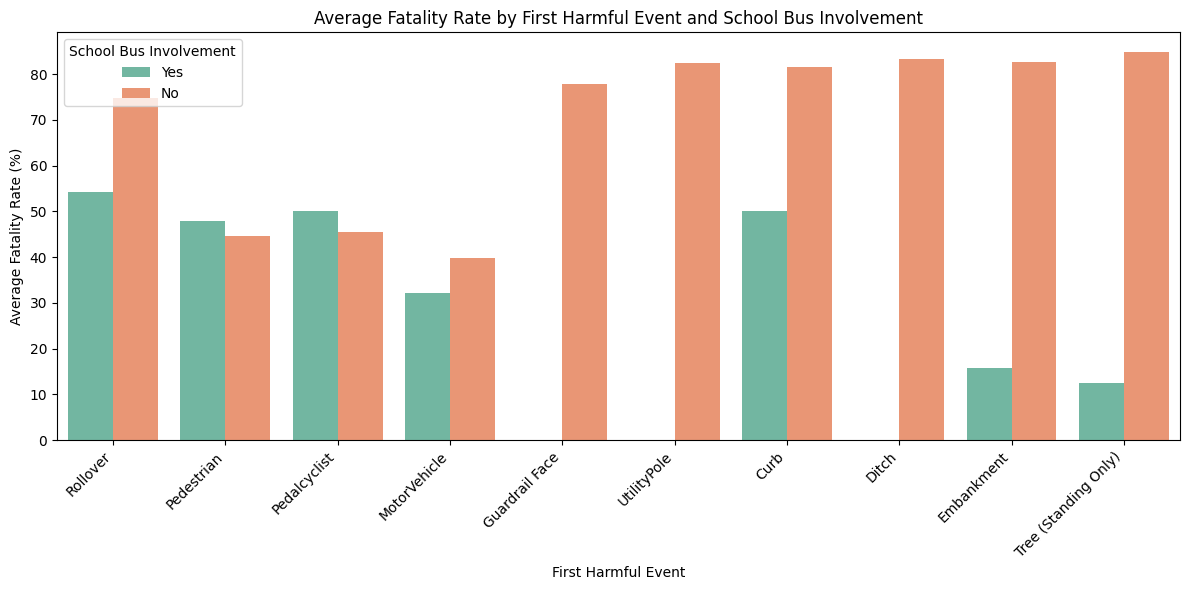

In [ ]:
# get th first 10 harmful events and filter the data based on them
top10_events = df_main['first_harmful_event_name'].value_counts().nlargest(10).index
df_top10 = df_main[df_main['first_harmful_event_name'].isin(top10_events)].copy()

# categorize based on if the accident included school bus or not
df_top10['school_bus_related'] = pd.Categorical(
    df_top10['school_bus_related'],
    categories=['Yes', 'No'],
    ordered=True
)


plt.figure(figsize=(12, 6))
sns.barplot(data=df_top10,x='first_harmful_event_name',y='fatality_rate_Pct',hue='school_bus_related',ci=None,palette='Set2')

plt.xlabel('First Harmful Event')
plt.ylabel('Average Fatality Rate (%)')
plt.title('Average Fatality Rate by First Harmful Event and School Bus Involvement')
plt.xticks(rotation=45, ha='right')
plt.legend(title='School Bus Involvement')
plt.tight_layout()
plt.show()


### ***Relation to Junction Specific and Intersection and Fatality Severity:***
#### **Insight Question 10:**
How does the relation to junction road affect the fatality severity?

***Analysis:***

### Visual 10: Fatal Crash Severity by Junction Type (Sunburst Chart)

This sunburst chart breaks down crash severity by **type of junction**.

- **Non-junction areas** make up the **largest share** of all crash severities, especially **High and Medium** — likely due to **higher speeds** and no traffic controls on open roads.
- **Intersection crashes** are common but mostly result in **Low or Medium severity**, suggesting that **traffic signals and signs** help reduce the fatal impact.
- **Driveway Access** and **Ramps** show **only low-severity crashes**, which makes sense due to **slower speeds** and **increased caution** in these zones.

**Conclusion:** Most fatal crashes happen **away from intersections**, and they tend to be **more severe**. This highlights the need for more **enforcement, visibility measures, and driver education** on straight or uninterrupted roads.


In [ ]:
# Categorize severity
df_main["severity"] = df_main["fatality_rate_Pct"].apply(lambda x: "High" if x >= 60 else "Medium" if x >= 30 else "Low")

# Group and count
sun_data = df_main.groupby(["relation_to_junction_specific_location_name", "severity"]).size().reset_index(name="count")

# Sunburst with closer legend
fig = px.sunburst(
    sun_data,
    path=["relation_to_junction_specific_location_name", "severity"],
    values="count",
    color="count",
    color_continuous_scale="Reds",
    title="How Does Relation to Junction Road Affect Fatality Severity?",
    hover_data={"count": True}
)

# Pull the legend closer to the chart
fig.update_layout(
    title_x=0.5,
    height=600,
    margin=dict(t=60, l=20, r=20, b=20),
    coloraxis_colorbar=dict(
        title="Crash Count",
        x=0.85,
        thickness=15,
        len=0.8))

fig.show()


***NEW PHASE***

***Holidays***

In [ ]:
# the US holidays scrapping
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.timeanddate.com/holidays/us/2016"

def scrape_holidays_table(page_url):
    resp = requests.get(page_url)
    resp.raise_for_status()

    soup = BeautifulSoup(resp.text, "html.parser")
    table = soup.find("table", id="holidays-table")
    if not table:
        raise RuntimeError("Could not find table#holidays-table on the page.")

    data = []
    for row in table.tbody.find_all("tr"):
        cols = row.find_all(["th", "td"])
        if len(cols) != 5:
            continue

        date = cols[0].get_text(strip=True)
        weekday = cols[1].get_text(strip=True)
        link_el = cols[2].find("a")
        name = link_el.get_text(strip=True) if link_el else cols[2].get_text(strip=True)
        href = link_el["href"] if link_el and link_el.has_attr("href") else ""
        type_ = cols[3].get_text(strip=True)
        details = cols[4].get_text(strip=True)

        data.append({
            "Date": date,
            "Weekday": weekday,
            "Name": name,
            "Link": href,
            "Type": type_,
            "Details": details
        })

    return pd.DataFrame(data)

if __name__ == "__main__":
    if not url:
        raise RuntimeError("Please set the `url` variable to the holidays page you want to scrape.")
    df = scrape_holidays_table(url)
    print(df.head())
    df.to_csv("us_holidays_2016.csv", index=False)


    Date    Weekday                            Name  \
0  Jan 1     Friday                  New Year's Day   
1  Jan 4     Monday               World Braille Day   
2  Jan 6  Wednesday                        Epiphany   
3  Jan 7   Thursday          Orthodox Christmas Day   
4  Jan 7   Thursday  International Programmers' Day   

                                            Link                  Type Details  
0                      /holidays/us/new-year-day       Federal Holiday          
1              /holidays/world/world-braille-day  Worldwide Observance          
2                          /holidays/us/epiphany             Christian          
3            /holidays/us/orthodox-christmas-day              Orthodox          
4  /holidays/world/international-programmers-day  Worldwide Observance          


In [ ]:
# cleanning the us holidays scrappign
import pandas as pd

INPUT_CSV  = "/content/us_holidays_2016.csv"
OUTPUT_CSV = "us_holidays_2016_cleaned.csv"
BASE_URL   = "https://www.timeanddate.com"

def expand_links(in_file, out_file):
    df = pd.read_csv(in_file)

    def prepend_base(link):
        if isinstance(link, str) and link.startswith("/"):
            return BASE_URL + link
        return link

    df["Link"] = df["Link"].apply(prepend_base)
    df.to_csv(out_file, index=False)
    print(f"full links to '{out_file}'")

if __name__ == "__main__":
    expand_links(INPUT_CSV, OUTPUT_CSV)


full links to 'us_holidays_2016_cleaned.csv'


In [ ]:
# further cleanning on the us holidays scrapping date time format
import pandas as pd

df = pd.read_csv("us_holidays_2016_cleaned.csv")

df["Date"] = (
    pd.to_datetime(df["Date"] + " 2016", format="%b %d %Y")
      .dt.date
)

print(df["Date"].head())
print(df.dtypes)

df.to_csv("us_holidays_2016_Final.csv", index=False)


0    2016-01-01
1    2016-01-04
2    2016-01-06
3    2016-01-07
4    2016-01-07
Name: Date, dtype: object
Date       object
Weekday    object
Name       object
Link       object
Type       object
Details    object
dtype: object


In [ ]:
# further cleanning on the same holidays data and unification of the column values and splitting them
import pandas as pd

holidays = pd.read_csv("/content/us_holidays_2016_Final.csv", parse_dates=["Date"])
holidays["Details"].fillna("", inplace=True)

abbrev_map = {
    'Alabama':'AL','Alaska':'AK','Arizona':'AZ','Arkansas':'AR','California':'CA',
    'Colorado':'CO','Connecticut':'CT','Delaware':'DE','Florida':'FL','Georgia':'GA',
    'Hawaii':'HI','Idaho':'ID','Illinois':'IL','Indiana':'IN','Iowa':'IA',
    'Kansas':'KS','Kentucky':'KY','Louisiana':'LA','Maine':'ME','Maryland':'MD',
    'Massachusetts':'MA','Michigan':'MI','Minnesota':'MN','Mississippi':'MS','Missouri':'MO',
    'Montana':'MT','Nebraska':'NE','Nevada':'NV','New Hampshire':'NH','New Jersey':'NJ',
    'New Mexico':'NM','New York':'NY','North Carolina':'NC','North Dakota':'ND',
    'Ohio':'OH','Oklahoma':'OK','Oregon':'OR','Pennsylvania':'PA','Rhode Island':'RI',
    'South Carolina':'SC','South Dakota':'SD','Tennessee':'TN','Texas':'TX','Utah':'UT',
    'Vermont':'VT','Virginia':'VA','Washington':'WA','West Virginia':'WV','Wisconsin':'WI',
    'Wyoming':'WY','District of Columbia':'DC'
}

state_names = list(abbrev_map.keys())
reverse_map = {abbr: name for name, abbr in abbrev_map.items()}

def get_states_for_holiday(detail):
    text = detail.strip()
    if not text:
        return state_names
    if text.lower().startswith("all except"):
        excluded = [abbr.strip() for abbr in text[10:].split(",")]
        excluded_full = [reverse_map.get(a, a) for a in excluded]
        return [s for s in state_names if s not in excluded_full]
    parts = [p.strip() for p in text.split(",")]
    return [reverse_map.get(p, p) for p in parts]

holidays["ApplicableStates"] = holidays["Details"].map(get_states_for_holiday)

by_state = (
    holidays
    .explode("ApplicableStates")
    .loc[:, ["Date", "ApplicableStates", "Name"]]
    .rename(columns={"ApplicableStates": "State", "Name": "HolidayName"})
)

print(by_state.head())
by_state.to_csv("holidays_by_state.csv", index=False)


        Date       State     HolidayName
0 2016-01-01     Alabama  New Year's Day
0 2016-01-01      Alaska  New Year's Day
0 2016-01-01     Arizona  New Year's Day
0 2016-01-01    Arkansas  New Year's Day
0 2016-01-01  California  New Year's Day


<ipython-input-428-f0e4c3b28361>:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





***Milage***

In [ ]:
# scrapping the roads milage by funcitonal system...last raw
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://www.fhwa.dot.gov/policyinformation/statistics/2016/hm220.cfm'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

table = soup.find('table')
if not table:
    raise Exception("Table not found")

header_rows = table.find_all('tr')[:2]
main_header_cells = header_rows[0].find_all(['th', 'td'])
sub_header_cells = header_rows[1].find_all(['th', 'td'])

main_headers = []
for cell in main_header_cells:
    colspan = int(cell.get('colspan', 1))
    main_headers.extend([cell.get_text(strip=True)] * colspan)

sub_headers = [cell.get_text(strip=True) for cell in sub_header_cells]

combined_headers = []
for main, sub in zip(main_headers, sub_headers):
    combined_headers.append(f"{main} - {sub}")
combined_headers.insert(0, "Year")

data_rows = table.find_all('tr')[2:]
row_2016 = None
for row in data_rows:
    cols = row.find_all(['td', 'th'])
    row_data = [col.get_text(strip=True) for col in cols]
    if row_data and row_data[0] == '2016':
        row_2016 = row_data
        break

if not row_2016:
    raise ValueError("2016 row missing")

min_len = min(len(combined_headers), len(row_2016))
headers_final = combined_headers[:min_len]
row_final = row_2016[:min_len]

df = pd.DataFrame([row_final], columns=headers_final)
df_t = df.transpose().reset_index()
df_t.columns = ['Attribute', '2016 Value']
df_t = df_t[df_t['Attribute'] != 'Year']

output_file = 'FHWA_HM220_2016.xlsx'
df_t.to_excel(output_file, index=False)

print(df_t)
print(f"\nExcel file saved as: {output_file}")

from google.colab import files
files.download(output_file)


                                 Attribute 2016 Value
1                        YEAR - INTERSTATE     29,133
2   RURAL - OTHER FREEWAYS AND EXPRESSWAYS      6,378
3         RURAL - OTHER PRINCIPAL ARTERIAL     89,728
4                   RURAL - MINOR ARTERIAL    133,809
5                  RURAL - MAJOR COLLECTOR    407,650
6                  RURAL - MINOR COLLECTOR    258,477
7                            RURAL - LOCAL  2,002,878
8                            RURAL - TOTAL  2,928,054
9                       RURAL - INTERSTATE     19,058
10  URBAN - OTHER FREEWAYS AND EXPRESSWAYS     12,255
11        URBAN - OTHER PRINCIPAL ARTERIAL     66,137
12                  URBAN - MINOR ARTERIAL    112,384
13                 URBAN - MAJOR COLLECTOR    129,173
14                 URBAN - MINOR COLLECTOR     16,961
15                           URBAN - LOCAL    856,085
16                           URBAN - TOTAL  1,212,054

Excel file saved as: FHWA_HM220_2016.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# cleaning road by milage for functional systems
import pandas as pd

df = pd.read_excel("FHWA_HM220_2016.xlsx")

df.columns = ['functional_system_name', 'mileage']

df['functional_system_name'] = df['functional_system_name'].str.replace('-', '_', n=1).str.strip()

df['land_use_name'] = df['functional_system_name'].str.split('_').str[0].str.strip()

df['functional_system_name'] = df['functional_system_name'].str.split('_', n=1).str[1].str.strip()

df = df[~df['functional_system_name'].str.contains('TOTAL', case=False, na=False)]

df = df[['land_use_name', 'functional_system_name', 'mileage']]


df['functional_system_name'] = df['functional_system_name'].replace({
    "OTHER FREEWAYS AND EXPRESSWAYS": "Principal Arterial – Other Freeways and Expressways",
    "OTHER PRINCIPAL ARTERIAL": "Principal Arterial – Other"
})

df['functional_system_name'] = df['functional_system_name'].apply(
    lambda x: x if x.startswith("Principal Arterial –") else x.title()
)


output_file = "Final_FHWA_HM220_NoTotals.xlsx"
df.to_excel(output_file, index=False)

from google.colab import files
files.download(output_file)

print(df.head())


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  land_use_name                             functional_system_name  mileage
0          YEAR                                         Interstate   29,133
1         RURAL  Principal Arterial – Other Freeways and Expres...    6,378
2         RURAL                         Principal Arterial – Other   89,728
3         RURAL                                     Minor Arterial  133,809
4         RURAL                                    Major Collector  407,650


***Laws "bans"***

In [ ]:
# this is the scrapping code for laws issued per state

import requests
from bs4 import BeautifulSoup
import pandas as pd
import urllib.parse

BASE_URL = "https://www.ghsa.org/state-laws-issues/distracted-driving"

def scrape_all_states():
    url = BASE_URL
    all_rows = []

    while True:
        resp = requests.get(url)
        resp.raise_for_status()
        soup = BeautifulSoup(resp.text, "html.parser")

        rows = soup.select(".views-row")
        if not rows:
            break

        for row in rows:
            h3 = row.select_one("h3")
            if not h3:
                continue
            state = h3.get_text(strip=True)
            entry = {"State": state}

            container = row.select_one("div.paragraph--type--state-law-issue")
            if container:
                for block in container.select("div.flex.flex-col"):
                    q = block.select_one("div.text-ghsa-burntorange")
                    a = block.select_one("div.whitespace-pre-line p")
                    if not (q and a):
                        continue
                    question = q.get_text(strip=True).rstrip("?")
                    answer   = a.get_text(strip=True)
                    entry[question] = answer

            all_rows.append(entry)

        next_tag = soup.select_one("li.pager__item--next a[rel=next]")
        if not next_tag:
            break

        next_href = next_tag["href"]
        url = urllib.parse.urljoin(BASE_URL, next_href)

    return pd.DataFrame(all_rows)

def main():
    df = scrape_all_states()
    cols = ["State"] + [c for c in df.columns if c != "State"]
    df = df[cols]

    df.to_csv("ghsa_distracted_driving.csv", index=False)
    print(f"→ Scraped {len(df)} states; output saved to ghsa_distracted_driving.csv")

if __name__ == "__main__":
    main()


→ Scraped 73 states; output saved to ghsa_distracted_driving.csv


In [ ]:
# cleanning the distracted driving laws
import pandas as pd

df = pd.read_csv('/content/ghsa_distracted_driving.csv', skip_blank_lines=True)
ban_cols_orig = [c for c in df.columns if c != 'State']
df = df.dropna(subset=ban_cols_orig, how='all')
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(r'\?', '', regex=True)
      .str.replace(r'[\s/]+', '_', regex=True)
)
ban_cols = [c for c in df.columns if c != 'state']
df[ban_cols] = df[ban_cols].fillna('')
for col in df.select_dtypes(include='object'):
    df[col] = df[col].str.strip()

def split_ban_cell(x):
    if pd.isna(x) or x == '':
        return pd.Series({'ban': 'No', 'law_type': ''})
    s = x.lower()
    law = 'Primary' if 'primary' in s else 'Secondary' if 'secondary' in s else ''
    yes = 'yes' in s or bool(law)
    return pd.Series({'ban': 'Yes' if yes else 'No', 'law_type': law})

for col in ban_cols:
    parsed = df[col].apply(split_ban_cell)
    df[f'{col}_flag'] = parsed['ban']
    df[f'{col}_law_type'] = parsed['law_type']
    df.drop(columns=[col], inplace=True)

df.to_csv('states_bans.csv', index=False)


***Expedentures***

In [ ]:
# scrapping the road expenditure by functional system
import requests
from bs4 import BeautifulSoup
import pandas as pd
from google.colab import files

url = 'https://www.fhwa.dot.gov/policyinformation/statistics/2016/fa10.cfm'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table')
if table is None:
    raise Exception("No table found on the webpage.")

data = []
row_spans = {}

rows = table.find_all('tr')
for row_index, row in enumerate(rows):
    cols = []
    col_index = 0
    cells = row.find_all(['td', 'th'])

    while col_index < len(cells):
        while (row_index, len(cols)) in row_spans:
            value = row_spans.pop((row_index, len(cols)))
            cols.append(value)

        cell = cells[col_index]
        cell_text = cell.get_text(strip=True)
        colspan = int(cell.get("colspan", 1))
        rowspan = int(cell.get("rowspan", 1))

        for _ in range(colspan):
            cols.append(cell_text)

        if rowspan > 1:
            for r in range(1, rowspan):
                for c in range(colspan):
                    row_spans[(row_index + r, len(cols) - colspan + c)] = cell_text

        col_index += 1

    data.append(cols)

df = pd.DataFrame(data)

output_file = "final_expenditure.xlsx"
df.to_excel(output_file, index=False, header=False)

files.download(output_file)

print(f"Saved and downloaded: {output_file}")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saved and downloaded: final_expenditure.xlsx


In [ ]:
# fianl expenditure cleaning
import pandas as pd

df = pd.read_excel("final_expenditure.xlsx", header=None)

new_header = [
    "TYPE OF IMPROVEMENT", "metric",
    "RURAL_OTHER FREEWAYS AND EXPRESSWAYS",
    "RURAL_OTHER PRINCIPAL ARTERIALS",
    "RURAL_MINOR ARTERIAL",
    "RURAL_MAJOR COLLECTOR",
    "RURAL_MINOR COLLECTOR",
    "RURAL_LOCAL",
    "URBAN_OTHER FREEWAYS AND EXPRESSWAYS",
    "URBAN_OTHER PRINCIPAL ARTERIAL",
    "URBAN_MINOR ARTERIAL",
    "URBAN_COLLECTOR",
    "URBAN_LOCAL",
    "NOT IDENTIFIED BY FUNCTIONAL CLASS(2)",
    "TOTAL"
]


cleaned_df = df.iloc[2:].reset_index(drop=True)

cleaned_df.columns = new_header


cleaned_df["TYPE OF IMPROVEMENT"] = cleaned_df["TYPE OF IMPROVEMENT"].fillna(method="ffill")


cleaned_df["TYPE OF IMPROVEMENT_metric"] = cleaned_df["TYPE OF IMPROVEMENT"] + "_" + cleaned_df["metric"]
cleaned_df.replace("-", 0, inplace=True)

cols = ["TYPE OF IMPROVEMENT_metric"] + [col for col in cleaned_df.columns if col not in ["TYPE OF IMPROVEMENT", "metric", "TYPE OF IMPROVEMENT_metric"]]


cleaned_df = cleaned_df[cols]


cleaned_df.head()


<ipython-input-434-eaf5b729c2e7>:29: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



,TYPE OF IMPROVEMENT_metric,RURAL_OTHER FREEWAYS AND EXPRESSWAYS,RURAL_OTHER PRINCIPAL ARTERIALS,RURAL_MINOR ARTERIAL,RURAL_MAJOR COLLECTOR,RURAL_MINOR COLLECTOR,RURAL_LOCAL,URBAN_OTHER FREEWAYS AND EXPRESSWAYS,URBAN_OTHER PRINCIPAL ARTERIAL,URBAN_MINOR ARTERIAL,URBAN_COLLECTOR,URBAN_LOCAL,NOT IDENTIFIED BY FUNCTIONAL CLASS(2),TOTAL
0,New Construction_Number Of Miles,0,24,38,70,0,0,1,13,2,14,0,1,163
1,New Construction_Federal Funds,"17,209","136,852","18,216","23,862",420,"37,361","118,612","117,610","58,705","76,762","12,050","209,722","827,381"
2,New Construction_Total Cost,"23,811","285,699","26,023","45,246",420,"48,159","1,094,176","521,051","99,528","134,247","15,857","875,856","3,170,073"
3,Relocation_Number Of Miles,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Relocation_Federal Funds,0,0,0,0,0,0,0,0,"4,799","2,654",0,"3,455","10,908"


In [ ]:
output_filename = "cleaned_highway_expenditure.xlsx"
cleaned_df.to_excel(output_filename, index=False)

from google.colab import files
files.download(output_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from google.colab import files

excel_path = "cleaned_highway_expenditure.xlsx"
sheet1_df = pd.read_excel(excel_path, sheet_name="Sheet1")

transposed_df = sheet1_df.transpose()


output_file = "transposed_expenditure.xlsx"
transposed_df.to_excel(output_file)

files.download(output_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from google.colab import files

file_path = "transposed_expenditure.xlsx"

raw_df = pd.read_excel(file_path, header=None)

raw_df.columns = raw_df.iloc[1]
df = raw_df.iloc[2:].copy()

df[['land_use_name', 'functional_system_name']] = df.iloc[:, 0].str.split('_', n=1, expand=True)

df.drop(columns=df.columns[0], inplace=True)

new_column_order = ['land_use_name', 'functional_system_name'] + [
    col for col in df.columns if col not in ['land_use_name', 'functional_system_name']
]
df = df[new_column_order]

df['functional_system_name'] = df['functional_system_name'].replace({
    "OTHER FREEWAYS AND EXPRESSWAYS": "Principal Arterial – Other Freeways and Expressways",
    "OTHER PRINCIPAL ARTERIALS": "Principal Arterial – Other"
})

df['functional_system_name'] = df['functional_system_name'].apply(
    lambda x: x if pd.isna(x) or x.startswith("Principal Arterial –") else x.title()
)

rows_to_drop = df[df['land_use_name'].isin([
    'NOT IDENTIFIED BY FUNCTIONAL CLASS(2)',
    'TOTAL'
])].index

df = df.drop(rows_to_drop)

df['land_use_name'] = df['land_use_name'].str.capitalize()

df.reset_index(drop=True, inplace=True)

output_file = "Cleaned_Expenditure_Sheet2.xlsx"
df.to_excel(output_file, index=False)

files.download(output_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

***Age***

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://www.fhwa.dot.gov/policyinformation/statistics/2016/dl22.cfm'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
tables = soup.find_all('table')

df_male = pd.read_html(str(tables[0]))[0]
df_female = pd.read_html(str(tables[2]))[0]
df_total = pd.read_html(str(tables[4]))[0]


df_male.to_csv('male.csv', index=False)
df_female.to_csv('female.csv', index=False)
df_total.to_csv('total.csv',index=False)

<ipython-input-438-26f92e5a32f0>:10: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.

<ipython-input-438-26f92e5a32f0>:11: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.

<ipython-input-438-26f92e5a32f0>:12: FutureWarning:

Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.



In [ ]:
import pandas as pd

df_male   = pd.read_csv('/content/male.csv')
df_female = pd.read_csv('/content/female.csv')
df_total  = pd.read_csv('/content/total.csv')

youth_cols   = ['19 AND UNDER', '20-24', '25-29']
middle_cols  = ['30-34', '35-39', '40-44', '45-49', '50-54', '55-59']
senior_cols  = ['60-64', '65-69', '70-74', '75-79', '80-84', '85 AND OVER']

def group_ages(df):
    df_v1 = df.copy()
    df_v1['youth']      = df_v1[youth_cols].sum(axis=1)
    df_v1['middle_age'] = df_v1[middle_cols].sum(axis=1)
    df_v1['seniors']    = df_v1[senior_cols].sum(axis=1)
    return df_v1[['STATE', 'youth', 'middle_age', 'seniors', 'TOTAL']]

df_male_v1   = group_ages(df_male)
df_female_v1 = group_ages(df_female)
df_total_v1  = group_ages(df_total)
print(df_male_v1)
print(df_female_v1)
print(df_total_v1)


               STATE     youth  middle_age   seniors      TOTAL
0            Alabama    445894      923158    544435    1913487
1          Alaska 2/     59337      139278     54260     252875
2            Arizona    509179     1403612    639458    2552249
3           Arkansas    264616      561563    332159    1158338
4         California   3021466     7307426   3003052   13331944
5        Colorado 2/    444181     1129586    512422    2086189
6        Connecticut    274496      680836    336065    1291397
7           Delaware     80722      180936    106150     367808
8      Dist. of Col.     34541      160946     46315     241802
9            Florida   1367105     3636588   2202782    7206475
10           Georgia    731834     1782514    813519    3327867
11            Hawaii     81960      257593    141908     481461
12             Idaho    135114      290153    158335     583602
13       Illinois 2/    925771     2205486   1069533    4200790
14           Indiana    496048     11621

In [ ]:
import pandas as pd

df_male   = pd.read_csv('/content/male.csv')
df_female = pd.read_csv('/content/female.csv')
df_total  = pd.read_csv('/content/total.csv')


youth_cols  = ['19 AND UNDER', '20-24', '25-29']
middle_cols = ['30-34', '35-39', '40-44', '45-49', '50-54', '55-59']
senior_cols = ['60-64', '65-69', '70-74', '75-79', '80-84', '85 AND OVER']

def group_ages(df, suffix):
    df_v1 = df.copy()
    df_v1[f'youth_{suffix}']      = df_v1[youth_cols].sum(axis=1)
    df_v1[f'middle_age_{suffix}'] = df_v1[middle_cols].sum(axis=1)
    df_v1[f'seniors_{suffix}']    = df_v1[senior_cols].sum(axis=1)
    return df_v1[['STATE',
                  f'youth_{suffix}',
                  f'middle_age_{suffix}',
                  f'seniors_{suffix}',
                  'TOTAL']]

df_male_v1   = group_ages(df_male,   'M')
df_female_v1 = group_ages(df_female, 'F')
df_total_v1  = group_ages(df_total,  'T')
print(df_male_v1)
print(df_female_v1)
print(df_total_v1)

               STATE   youth_M  middle_age_M  seniors_M      TOTAL
0            Alabama    445894        923158     544435    1913487
1          Alaska 2/     59337        139278      54260     252875
2            Arizona    509179       1403612     639458    2552249
3           Arkansas    264616        561563     332159    1158338
4         California   3021466       7307426    3003052   13331944
5        Colorado 2/    444181       1129586     512422    2086189
6        Connecticut    274496        680836     336065    1291397
7           Delaware     80722        180936     106150     367808
8      Dist. of Col.     34541        160946      46315     241802
9            Florida   1367105       3636588    2202782    7206475
10           Georgia    731834       1782514     813519    3327867
11            Hawaii     81960        257593     141908     481461
12             Idaho    135114        290153     158335     583602
13       Illinois 2/    925771       2205486    1069533    420

In [ ]:
df_male_v1   = df_male_v1.rename(columns={'TOTAL': 'TOTAL_M'})
df_female_v1 = df_female_v1.rename(columns={'TOTAL': 'TOTAL_F'})
df_total_v1  = df_total_v1.rename(columns={'TOTAL': 'TOTAL_T'})

df_all = (
    df_male_v1
      .merge(df_female_v1, on='STATE')
      .merge(df_total_v1,  on='STATE')
)
print(df_all)

               STATE   youth_M  middle_age_M  seniors_M    TOTAL_M   youth_F  \
0            Alabama    445894        923158     544435    1913487    445500   
1          Alaska 2/     59337        139278      54260     252875     64644   
2            Arizona    509179       1403612     639458    2552249    490186   
3           Arkansas    264616        561563     332159    1158338    262940   
4         California   3021466       7307426    3003052   13331944   2839724   
5        Colorado 2/    444181       1129586     512422    2086189    419763   
6        Connecticut    274496        680836     336065    1291397    263149   
7           Delaware     80722        180936     106150     367808     82276   
8      Dist. of Col.     34541        160946      46315     241802     40551   
9            Florida   1367105       3636588    2202782    7206475   1354401   
10           Georgia    731834       1782514     813519    3327867    765440   
11            Hawaii     81960        25

In [ ]:
df_all['youth_M_pct']      = df_all['youth_M']      / df_all['TOTAL_T']
df_all['middle_age_M_pct'] = df_all['middle_age_M'] / df_all['TOTAL_T']
df_all['seniors_M_pct']    = df_all['seniors_M']    / df_all['TOTAL_T']

df_all['youth_F_pct']      = df_all['youth_F']      / df_all['TOTAL_T']
df_all['middle_age_F_pct'] = df_all['middle_age_F'] / df_all['TOTAL_T']
df_all['seniors_F_pct']    = df_all['seniors_F']    / df_all['TOTAL_T']

df_all.to_csv('merged_age_gender_tables.csv', index = False)

print(df_all)

               STATE   youth_M  middle_age_M  seniors_M    TOTAL_M   youth_F  \
0            Alabama    445894        923158     544435    1913487    445500   
1          Alaska 2/     59337        139278      54260     252875     64644   
2            Arizona    509179       1403612     639458    2552249    490186   
3           Arkansas    264616        561563     332159    1158338    262940   
4         California   3021466       7307426    3003052   13331944   2839724   
5        Colorado 2/    444181       1129586     512422    2086189    419763   
6        Connecticut    274496        680836     336065    1291397    263149   
7           Delaware     80722        180936     106150     367808     82276   
8      Dist. of Col.     34541        160946      46315     241802     40551   
9            Florida   1367105       3636588    2202782    7206475   1354401   
10           Georgia    731834       1782514     813519    3327867    765440   
11            Hawaii     81960        25

In [ ]:
file_path_holiday = "/content/holidays_by_state.csv"
df_Holydays = pd.read_csv(file_path_holiday)
df_Holydays.head()

,Date,State,HolidayName
0,2016-01-01,Alabama,New Year's Day
1,2016-01-01,Alaska,New Year's Day
2,2016-01-01,Arizona,New Year's Day
3,2016-01-01,Arkansas,New Year's Day
4,2016-01-01,California,New Year's Day


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 46 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   land_use_name                                     11 non-null     object
 1   functional_system_name                            11 non-null     object
 2   New Construction_Number Of Miles                  11 non-null     object
 3   New Construction_Federal Funds                    11 non-null     object
 4   New Construction_Total Cost                       11 non-null     object
 5   Relocation_Number Of Miles                        11 non-null     object
 6   Relocation_Federal Funds                          11 non-null     object
 7   Relocation_Total Cost                             11 non-null     object
 8   Reconstruction-Added Capacity_Number Of Miles     11 non-null     object
 9   Reconstruction-Added Capacity_Fede

In [ ]:
df_main["timestamp_of_crash_UTC"] = pd.to_datetime(
    df_main["timestamp_of_crash_UTC"],
    format="%Y-%m-%d %H:%M"
).dt.date


In [ ]:
import pandas as pd

df_main["Date"] = pd.to_datetime(df_main["timestamp_of_crash_UTC"]).dt.date
df_Holydays["Date"] = pd.to_datetime(df_Holydays["Date"], infer_datetime_format=True).dt.date

df_main["State"] = df_main["state_name"].str.strip().str.title()
df_Holydays["State"] = df_Holydays["State"].str.strip().str.title()

df_Holydays = df_Holydays.drop_duplicates(subset=["Date", "State"])

merged = (
    df_main
    .merge(
        df_Holydays[["Date", "State", "HolidayName"]],
        on=["Date", "State"],
        how="left",
        validate="many_to_one"
    )
    .drop(columns=["Date"])
)

print(merged[["timestamp_of_crash_UTC","State","HolidayName"]].head())


  timestamp_of_crash_UTC     State       HolidayName
0             2016-12-04   Wyoming               NaN
1             2016-12-16     Idaho               NaN
2             2016-01-06  Arkansas          Epiphany
3             2016-08-07     Texas  Purple Heart Day
4             2016-07-21   Florida               NaN


<ipython-input-446-96eac90be3ec>:4: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



In [ ]:
merged["HolidayName"] = merged["HolidayName"].fillna("no holiday")

merged["is_holiday"] = (merged["HolidayName"] != "no holiday").astype(int)

merged[["timestamp_of_crash_UTC","state_name","HolidayName","is_holiday"]].head()

,timestamp_of_crash_UTC,state_name,HolidayName,is_holiday
0,2016-12-04,Wyoming,no holiday,0
1,2016-12-16,Idaho,no holiday,0
2,2016-01-06,Arkansas,Epiphany,1
3,2016-08-07,Texas,Purple Heart Day,1
4,2016-07-21,Florida,no holiday,0


In [ ]:
file_path_mileage = "/content/Final_FHWA_HM220_NoTotals.xlsx"
df_milage = pd.read_excel(file_path_mileage)
df_milage.head()

,land_use_name,functional_system_name,mileage
0,YEAR,Interstate,"29,133"
1,RURAL,Principal Arterial – Other Freeways and Expres...,"6,378"
2,RURAL,Principal Arterial – Other,"89,728"
3,RURAL,Minor Arterial,"133,809"
4,RURAL,Major Collector,"407,650"


In [ ]:
df_milage["land_use_name"] = (
    df_milage["land_use_name"]
      .replace({"YEAR": "RURAL"})
      .str.title()
)

df_milage.head()


,land_use_name,functional_system_name,mileage
0,Rural,Interstate,"29,133"
1,Rural,Principal Arterial – Other Freeways and Expres...,"6,378"
2,Rural,Principal Arterial – Other,"89,728"
3,Rural,Minor Arterial,"133,809"
4,Rural,Major Collector,"407,650"


In [ ]:
import pandas as pd

merged["land_use_name"] = merged["land_use_name"].str.strip().str.title()
merged["functional_system_name"] = merged["functional_system_name"].str.strip()

df_milage["land_use_name"] = df_milage["land_use_name"].str.strip().str.title()
df_milage["functional_system_name"] = df_milage["functional_system_name"].str.strip()

df_milage["mileage"] = (
    df_milage["mileage"]
      .astype(str)
      .str.replace(",", "", regex=False)
      .astype(int)
)


df_milage_agg = (
    df_milage
    .groupby(
        ["land_use_name", "functional_system_name"],
        as_index=False
    )
    .agg({"mileage": "sum"})
)


final = merged.merge(
    df_milage_agg,
    on=["land_use_name", "functional_system_name"],
    how="left",
    validate="many_to_one"
)


print(final.shape)
print(final[["land_use_name","functional_system_name","mileage"]].drop_duplicates().head())


(34494, 56)
    land_use_name               functional_system_name  mileage
0           Rural                           Interstate  48191.0
2           Urban                           Interstate      NaN
332         Rural           Principal Arterial – Other  89728.0
422         Urban           Principal Arterial – Other  66137.0
539         Rural  Principal Arterial – Other Freeways      NaN


In [ ]:
final_crash_data = final.copy()

In [ ]:
import pandas as pd


final["mileage"] = (
    final
      .groupby(["land_use_name", "functional_system_name"])["mileage"]
      .transform(lambda grp: grp.fillna(grp.median()))
)


overall_med = final["mileage"].median()
final["mileage"] = final["mileage"].fillna(overall_med)


print(final["mileage"].isna().sum())
print("Overall median used for fallback:", overall_med)


0
Overall median used for fallback: 112384.0


In [ ]:
final.tail()

,state_number,state_name,total_vehicle_forms_submitted,motor_vehicles_in_transport,parked_working_vehicles,forms_for_non_motorized_persons,non_motorized_persons_in_transport,motor_vehicle_occupants,forms_for_motorized_persons,day_of_crash,...,timestamp_of_crash_UTC,EMS_Response_Time,number_of_persons_in_accidents,fatality_rate_Pct,EMS_Category,severity,State,HolidayName,is_holiday,mileage
34489,51,Virginia,2,1,1,1,1,1,1,29,...,2016-07-29,13.0,2,50.0,9-30 min,Medium,Virginia,no holiday,0,112384.0
34490,35,New Mexico,1,1,0,0,0,1,1,6,...,2016-11-06,8.0,1,100.0,2-8 min,High,New Mexico,International Day for Preventing the Exploitat...,1,856085.0
34491,4,Arizona,1,1,0,0,0,2,2,11,...,2016-08-11,0.0,2,50.0,0-1 min,Medium,Arizona,no holiday,0,2002878.0
34492,53,Washington,1,1,0,0,0,2,2,23,...,2016-01-23,0.0,2,50.0,0-1 min,Medium,Washington,no holiday,0,112384.0
34493,4,Arizona,1,1,0,0,0,2,2,29,...,2016-01-29,0.0,2,50.0,0-1 min,Medium,Arizona,no holiday,0,2002878.0


In [ ]:
file_path_bans = "/content/states_bans.csv"
df_bans = pd.read_csv(file_path_bans)
df_bans.head()

,state,hand-held_ban_flag,hand-held_ban_law_type,all_cell_phone_ban_school_bus_drivers_flag,all_cell_phone_ban_school_bus_drivers_law_type,all_cell_phone_ban_novice_drivers_flag,all_cell_phone_ban_novice_drivers_law_type,text_messaging_ban_flag,text_messaging_ban_law_type
0,Alabama,Yes,Secondary,Yes,NaN,Yes,Primary,Yes,Primary
1,Alaska,No,NaN,No,NaN,No,NaN,Yes,Primary
2,Arizona,Yes,Primary,Yes,Primary,Yes,Secondary,Yes,Primary
3,Arkansas,Yes,Primary,Yes,Primary,Yes,Secondary,Yes,Primary
4,California,Yes,Primary,Yes,Primary,Yes,Secondary,Yes,Primary


In [ ]:
df_bans.replace("", "Unknown", inplace=True)


df_bans.fillna("Unknown", inplace=True)

df_bans.head()

,state,hand-held_ban_flag,hand-held_ban_law_type,all_cell_phone_ban_school_bus_drivers_flag,all_cell_phone_ban_school_bus_drivers_law_type,all_cell_phone_ban_novice_drivers_flag,all_cell_phone_ban_novice_drivers_law_type,text_messaging_ban_flag,text_messaging_ban_law_type
0,Alabama,Yes,Secondary,Yes,Unknown,Yes,Primary,Yes,Primary
1,Alaska,No,Unknown,No,Unknown,No,Unknown,Yes,Primary
2,Arizona,Yes,Primary,Yes,Primary,Yes,Secondary,Yes,Primary
3,Arkansas,Yes,Primary,Yes,Primary,Yes,Secondary,Yes,Primary
4,California,Yes,Primary,Yes,Primary,Yes,Secondary,Yes,Primary


In [ ]:
final["State"] = final["State"].str.strip().str.title()
df_bans["state"] = df_bans["state"].str.strip().str.title()

df_bans_unique = df_bans.drop_duplicates(subset="state", keep="first")


final_with_bans = final.merge(
    df_bans_unique,
    left_on="State",
    right_on="state",
    how="left",
    validate="many_to_one"
)

final_with_bans = final_with_bans.drop(columns=["state"])


print(final_with_bans.shape)
print(final_with_bans.filter(like="ban").head())


(34494, 64)
  hand-held_ban_flag hand-held_ban_law_type  \
0                 No                Unknown   
1                Yes                Primary   
2                Yes                Primary   
3                Yes                Primary   
4                Yes                Primary   

  all_cell_phone_ban_school_bus_drivers_flag  \
0                                         No   
1                                         No   
2                                        Yes   
3                                        Yes   
4                                         No   

  all_cell_phone_ban_school_bus_drivers_law_type  \
0                                        Unknown   
1                                        Unknown   
2                                        Primary   
3                                        Primary   
4                                        Unknown   

  all_cell_phone_ban_novice_drivers_flag  \
0                                     No   
1              

In [ ]:
file_path_expend = "/content/Cleaned_Expenditure_Sheet2.xlsx"
df_expnd = pd.read_excel(file_path_expend)
df_expnd.head()

,land_use_name,functional_system_name,New Construction_Number Of Miles,New Construction_Federal Funds,New Construction_Total Cost,Relocation_Number Of Miles,Relocation_Federal Funds,Relocation_Total Cost,Reconstruction-Added Capacity_Number Of Miles,Reconstruction-Added Capacity_Federal Funds,...,Environmentally Related_Federal Funds,Environmentally Related_Total Cost,Other 3/_Number Of Projects,Other 3/_Federal Funds,Other 3/_Total Cost,U.S. Total_Number Of Miles,U.S. Total_Number Of Bridges,U.S. Total_Number Of Projects,U.S. Total_Federal Funds,U.S. Total_Total Cost
0,Rural,Principal Arterial – Other Freeways and Expres...,0,"17,209","23,811",0,0,0,10,"16,714",...,"8,182","9,636",103,"106,211","168,003",889,0,"1,023","398,912","731,957"
1,Rural,Principal Arterial – Other,24,"136,852","285,699",0,0,"10,725",418,"326,742",...,"22,093","24,900",712,"795,684","1,297,120","10,416",0,"6,052","3,448,619","5,850,304"
2,Rural,Minor Arterial,38,"18,216","26,023",0,0,0,129,"63,855",...,"2,781","2,952",688,"506,656","810,291","10,562",0,"6,021","2,241,618","3,941,940"
3,Rural,Major Collector,70,"23,862","45,246",0,0,0,146,"39,878",...,"2,082","2,468",863,"493,828","810,682","12,345",0,"7,663","2,096,637","3,682,112"
4,Rural,Minor Collector,0,420,420,0,0,0,1,809,...,86,226,136,"62,906","98,132",329,0,"1,116","179,487","316,006"


In [ ]:
for df in (final_with_bans, df_expnd):
    df["land_use_name"] = df["land_use_name"].str.strip().str.title()
    df["functional_system_name"] = df["functional_system_name"].str.strip()


merged_full = final_with_bans.merge(
    df_expnd,
    on=["land_use_name", "functional_system_name"],
    how="left",
    validate="many_to_one"
)

exp_cols = [col for col in df_expnd.columns
            if col not in ["land_use_name", "functional_system_name"]]

merged_full[exp_cols] = merged_full[exp_cols].fillna(0)


print("Any NaNs left in exp cols?", merged_full[exp_cols].isna().any().any())
print(merged_full[exp_cols].head())


Any NaNs left in exp cols? False
   New Construction_Number Of Miles New Construction_Federal Funds  \
0                               0.0                              0   
1                               0.0                              0   
2                               0.0                              0   
3                               0.0                              0   
4                               0.0                              0   

  New Construction_Total Cost  Relocation_Number Of Miles  \
0                           0                         0.0   
1                           0                         0.0   
2                           0                         0.0   
3                           0                         0.0   
4                           0                         0.0   

  Relocation_Federal Funds Relocation_Total Cost  \
0                        0                     0   
1                        0                     0   
2                      

In [ ]:
set(df_expnd["functional_system_name"].unique())

{'Collector',
 'Local',
 'Major Collector',
 'Minor Arterial',
 'Minor Collector',
 'Other Principal Arterial',
 'Principal Arterial – Other',
 'Principal Arterial – Other Freeways and Expressways'}

In [ ]:
df_expnd["functional_system_name"] = (
    df_expnd["functional_system_name"]
      .str.replace(
          r"^Principal Arterial\s*–\s*Other Freeways.*$",
          "Principal Arterial – Other Freeways",
          regex=True
      )
      .str.strip()
)


print(df_expnd["functional_system_name"].unique())


['Principal Arterial – Other Freeways' 'Principal Arterial – Other'
 'Minor Arterial' 'Major Collector' 'Minor Collector' 'Local'
 'Other Principal Arterial' 'Collector']


In [ ]:
file_path_gender = "/content/merged_age_gender_tables.csv"
df_gender = pd.read_csv(file_path_gender)
df_gender.head()

,STATE,youth_M,middle_age_M,seniors_M,TOTAL_M,youth_F,middle_age_F,seniors_F,TOTAL_F,youth_T,middle_age_T,seniors_T,TOTAL_T,youth_M_pct,middle_age_M_pct,seniors_M_pct,youth_F_pct,middle_age_F_pct,seniors_F_pct
0,Alabama,445894,923158,544435,1913487,445500,977743,606352,2029595,891394,1900901,1150787,3943082,0.113083,0.234121,0.138073,0.112983,0.247964,0.153776
1,Alaska 2/,59337,139278,54260,252875,64644,152582,64484,281710,123981,291860,118744,534585,0.110996,0.260535,0.101499,0.120924,0.285421,0.120624
2,Arizona,509179,1403612,639458,2552249,490186,1365017,674853,2530056,999365,2768629,1314311,5082305,0.100187,0.276176,0.125820,0.096450,0.268582,0.132785
3,Arkansas,264616,561563,332159,1158338,262940,570601,399224,1232765,527556,1132164,731383,2391103,0.110667,0.234855,0.138915,0.109966,0.238635,0.166962
4,California,3021466,7307426,3003052,13331944,2839724,7045573,2982195,12867492,5861190,14352999,5985247,26199436,0.115326,0.278915,0.114623,0.108389,0.268921,0.113827


In [ ]:
import pandas as pd
from google.colab import files


file_path_gender = "/content/merged_age_gender_tables.csv"
df_gender = pd.read_csv(file_path_gender)


df_gender["State"] = df_gender["STATE"].str.strip().str.title()

merged_full["State"] = merged_full["State"].str.strip().str.title()


df_gender = df_gender.drop(columns=["STATE"])


merged_full_with_gender = merged_full.merge(
    df_gender,
    on="State",
    how="left",
    validate="many_to_one"
)


print("New shape:", merged_full_with_gender.shape)
print(merged_full_with_gender.filter(regex="youth_|middle_age_|seniors_").head())



New shape: (34494, 126)
     youth_M  middle_age_M  seniors_M    youth_F  middle_age_F  seniors_F  \
0    47226.0      106323.0    61236.0    45025.0      101978.0    59310.0   
1   135114.0      290153.0   158335.0   130492.0      287272.0   159556.0   
2   264616.0      561563.0   332159.0   262940.0      570601.0   399224.0   
3  1814092.0     4242664.0  1898592.0  1778093.0     4409186.0  2019755.0   
4  1367105.0     3636588.0  2202782.0  1354401.0     3752088.0  2362196.0   

     youth_T  middle_age_T  seniors_T  youth_M_pct  middle_age_M_pct  \
0    92251.0      208301.0   120546.0     0.112150          0.252490   
1   265606.0      577425.0   317891.0     0.116385          0.249933   
2   527556.0     1132164.0   731383.0     0.110667          0.234855   
3  3592185.0     8651850.0  3918347.0     0.112242          0.262502   
4  2721506.0     7388676.0  4564978.0     0.093158          0.247806   

   seniors_M_pct  youth_F_pct  middle_age_F_pct  seniors_F_pct  
0       0.14542

In [ ]:
output_path = "/content/merged_full_with_gender.csv"
merged_full_with_gender.to_csv(output_path, index=False)
files.download(output_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **1.Holiday Impact on Fatal Crash Totals: Top 5 Most Affected States**

### ***Intent of the plot:***

 To identify and compare the top 5 U.S. states that show the largest difference in traffic fatalities between holiday and non-holiday periods.

###***Description of the Plot:***

Each of the top five states with the biggest change in fatalities is shown by two bars in this grouped bar chart: one for non-holiday fatalities (in blue) and one for holiday fatalities (in orange). Total fatalities are displayed on the y-axis, while states are displayed on the x-axis.

###***Interpretation:***

According to the plot, there are substantially more deaths during holidays than during non-holiday periods in areas like Texas and California. This implies that in many areas, holiday seasons might be linked to higher crash risks, possibly as a result of things like increased traffic, drunk driving, or longer travel times.

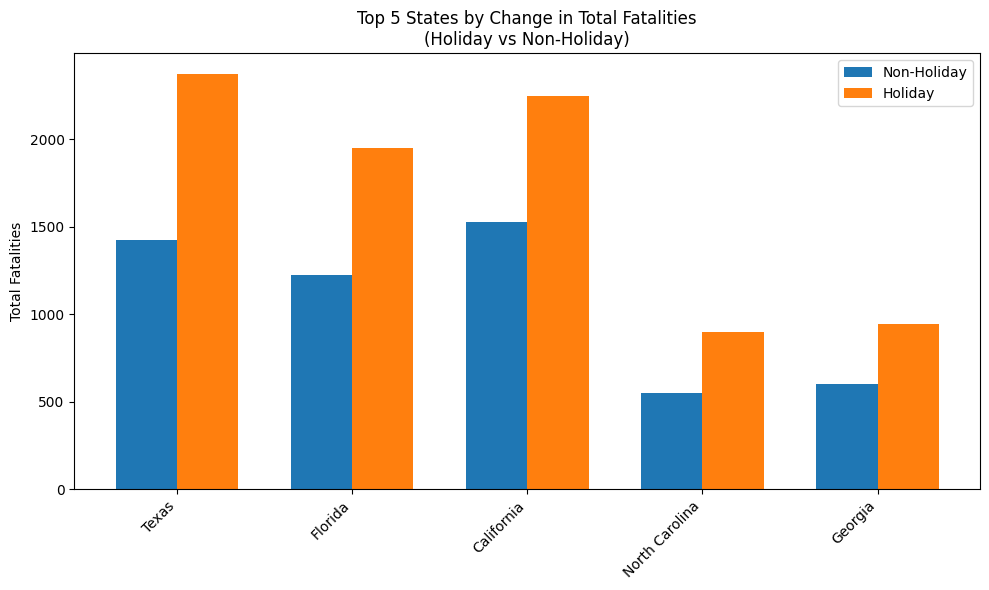

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter and group fatalities on holidays by state
holiday_fat = merged_full_with_gender[merged_full_with_gender['is_holiday'] == 1].groupby('state_name')['number_of_fatalities'].sum()
# Same as above, but for non-holiday days
nonholiday_fat = merged_full_with_gender[merged_full_with_gender['is_holiday'] == 0].groupby('state_name')['number_of_fatalities'].sum()

# Combine both results into one DataFrame for easy comparison
diff_df = pd.DataFrame({
    'Non-Holiday Fatalities': nonholiday_fat,
    'Holiday Fatalities': holiday_fat
}).fillna(0)
# Calculate the absolute difference in fatalities between holidays and non-holidays
diff_df['Absolute Difference'] = (diff_df['Holiday Fatalities'] - diff_df['Non-Holiday Fatalities']).abs()
# Get the top 5 states where the difference is largest
top_states = diff_df['Absolute Difference'].nlargest(5).index
# Slice the data for plotting: only keep top 5 states and relevant columns
top_data = diff_df.loc[top_states, ['Non-Holiday Fatalities', 'Holiday Fatalities']]

# Set up the bar chart
plt.figure(figsize=(10, 6))
x = range(len(top_states))
bar_width = 0.35
# Draw bars for non-holiday fatalities
plt.bar(x, top_data['Non-Holiday Fatalities'], bar_width, label='Non-Holiday')
# Draw bars for holiday fatalities next to them
plt.bar([i + bar_width for i in x], top_data['Holiday Fatalities'], bar_width, label='Holiday')
# Format the x-axis with state names
plt.xticks([i + bar_width/2 for i in x], top_states, rotation=45, ha='right')
# Add axis labels and title
plt.ylabel('Total Fatalities')
plt.title('Top 5 States by Change in Total Fatalities\n(Holiday vs Non-Holiday)')
# Show legend and tidy up layout
plt.legend()
plt.tight_layout()
plt.show()



# **2.Overall Distribution of Fatalities: Holiday vs Non-Holiday Periods**

### ***Intent of the Plot***

######To compare the overall share of fatalities that occurred during holidays versus non-holidays in the dataset.

### ***Description of the plot:***

The percentage of all fatalities that occured during holiday times (in blue) and non-holiday periods (in orange) is depicted in this pie chart, which reveals that 60.3% of fatalities occurred during holidays and 39.7% occurred during non-holiday periods.

### ***Interpretation:***

######The fact that a higher percentage of deaths happened on holidays raises the possibility that there are higher traffic risks at these times. This might be the result of things like more travel, riskier driving, or heavier traffic around the holidays.

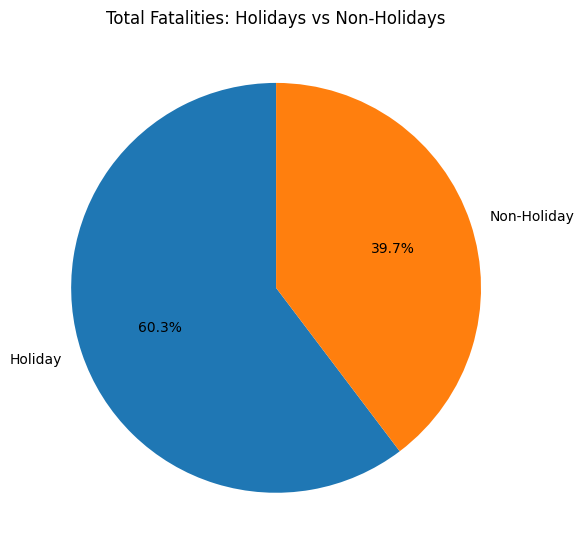

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Get total number of fatalities that happened on holidays
total_holiday = merged_full_with_gender[merged_full_with_gender['is_holiday'] == 1]['number_of_fatalities'].sum()
# Get total number of fatalities that happened on non-holidays
total_nonholiday = merged_full_with_gender[merged_full_with_gender['is_holiday'] == 0]['number_of_fatalities'].sum()
# Set labels and corresponding values for the pie chart
labels = ['Holiday', 'Non-Holiday']
sizes = [total_holiday, total_nonholiday]

# Create a pie chart to visualize the proportion of fatalities
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Total Fatalities: Holidays vs Non-Holidays')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Get all columns that represent types of laws (column names ending in '_law_type')
law_cols = [c for c in merged_full_with_gender.columns if c.endswith('_law_type')]

# Function to convert law type to a numeric score
# Primary = 2, Secondary = 1, No law or unknown = 0
def encode_law(value):
    if value == 'Primary':
        return 2
    elif value == 'Secondary':
        return 1
    else:
        return 0
# Apply encoding to each law column and create a new column with '_score' suffix
for col in law_cols:
    merged_full_with_gender[col + '_score'] = merged_full_with_gender[col].apply(encode_law)

merged_full_with_gender['law_score'] = merged_full_with_gender[[c + '_score' for c in law_cols]].sum(axis=1)


state_laws = merged_full_with_gender.groupby('state_name')['law_score'].first().reset_index()
# Aggregate stats per state: total law score, total deaths, and number of crash records
state_stats = (
    merged_full_with_gender
    .groupby('state_name')
    .agg(
        law_score=('law_score', 'first'),
        total_fatalities=('number_of_fatalities', 'sum'),
        crash_count=('number_of_fatalities', 'size')
    )
    .reset_index()
)
# Compute fatality rate = total deaths / number of crashes
state_stats['fatality_rate'] = state_stats['total_fatalities'] / state_stats['crash_count']

# Get the 5 states with the strongest traffic laws
top5 = state_stats.nlargest(5, 'law_score')[['state_name','law_score','fatality_rate']]
# Get the 5 states with the weakest traffic laws
bottom5 = state_stats.nsmallest(5, 'law_score')[['state_name','law_score','fatality_rate']]
# Show results in a readable format
print("Top 5 states by Law Score:")
print(top5.to_string(index=False))

print("\nBottom 5 states by Law Score:")
print(bottom5.to_string(index=False))


Top 5 states by Law Score:
          state_name  law_score  fatality_rate
         Connecticut          8       1.041522
            Delaware          8       1.025862
District of Columbia          8       1.038462
            Illinois          8       1.078000
           Louisiana          8       1.076812

Bottom 5 states by Law Score:
    state_name  law_score  fatality_rate
       Montana          0       1.111111
        Alaska          2       1.082192
  Pennsylvania          2       1.092166
South Carolina          2       1.083953
  South Dakota          2       1.127451


# **3.Safety Law Enforcement vs. Crash Frequency: Insights from Top and Bottom  States**


### ***Intent of the plot:***

######To explore whether stricter traffic safety laws (higher law scores) correlate with lower crash counts across states.

### ***Description of the Plot:***

######States are displayed on the x-axis, and the figure shows a line plot of crash counts (right y-axis) for the top 5 and lowest 5 states according to their law enforcement score, with bars representing law scores (left y-axis).

### ***Interpretation:***

######States with higher law scores (like Connecticut and Illinois) generally show lower crash counts, while states with low law scores (like South Carolina and Alaska) exhibit higher crash counts. This suggests a potential inverse relationship: stronger traffic law enforcement may be linked to fewer fatal crashes.

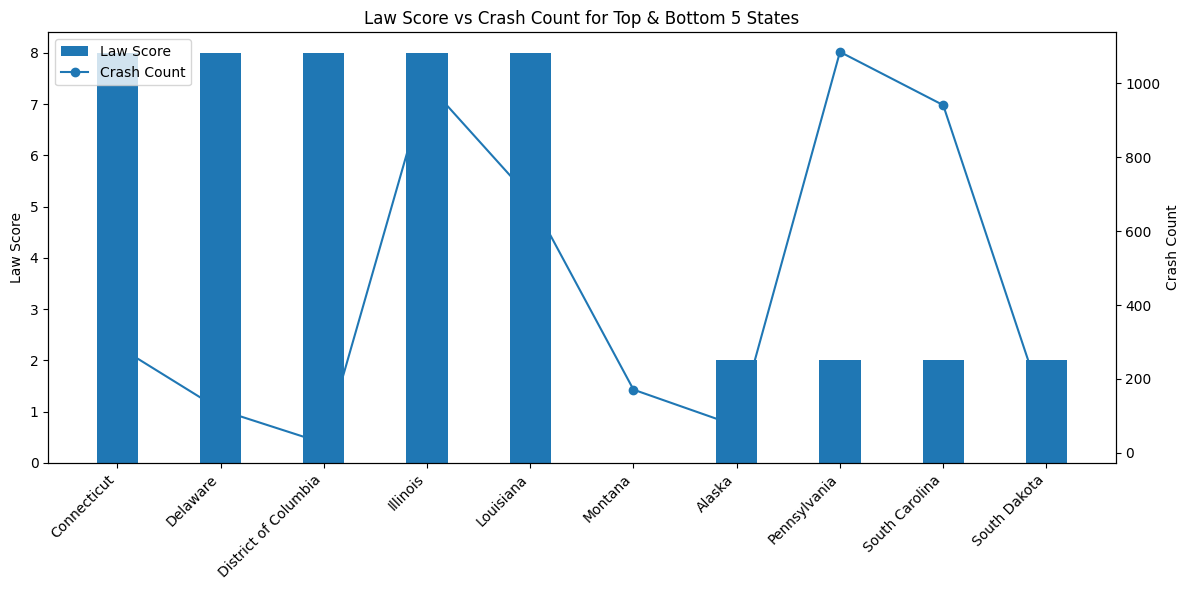

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get all columns that represent law types
law_cols = [c for c in merged_full_with_gender.columns if c.endswith('_law_type')]

# Simple function to assign a score to each law type
# Primary law = 2, Secondary = 1, None or missing = 0
def encode_law(v): return 2 if v=='Primary' else 1 if v=='Secondary' else 0
# Apply the scoring function to each law column and create a corresponding '_score' column
for col in law_cols:
    merged_full_with_gender[col + '_score'] = merged_full_with_gender[col].apply(encode_law)
merged_full_with_gender['law_score'] = merged_full_with_gender[[c + '_score' for c in law_cols]].sum(axis=1)

state_stats = (
    merged_full_with_gender.groupby('state_name')
      .agg(
          law_score=('law_score','first'),
          crash_count=('number_of_fatalities','size')
      )
      .reset_index()
)

# Get top 5 and bottom 5 states based on law score
top5 = state_stats.nlargest(5, 'law_score')
bot5 = state_stats.nsmallest(5, 'law_score')
# Combine both sets into one DataFrame for plotting
viz = pd.concat([top5, bot5]).reset_index(drop=True)
# Start a dual-axis plot (bar + line chart)
fig, ax1 = plt.subplots(figsize=(12, 6))

x = range(len(viz))
states = viz['state_name']
# Bar chart: law score per state
ax1.bar(x, viz['law_score'], width=0.4, label='Law Score')
ax1.set_ylabel('Law Score')
ax1.set_xticks(x)
ax1.set_xticklabels(states, rotation=45, ha='right')
# Line plot: crash count on a second y-axis
ax2 = ax1.twinx()
ax2.plot(x, viz['crash_count'], marker='o', label='Crash Count')
ax2.set_ylabel('Crash Count')
# Merge legends from both plots
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Law Score vs Crash Count for Top & Bottom 5 States')
plt.tight_layout()
plt.show()


# **4.Crash Frequency Patterns in Relation to State Safety Laws**


### ***Intent of the Plot***

######To analyze whether stricter traffic laws are associated with fewer crashes across U.S. states.

###***Description of the Plot:***

######The scatter plot displays crash count (y-axis) against law score (x-axis) for each state. A red regression line is included, and the linear equation and correlation coefficient (r = 0.14) are shown.

### ***Interpretation:***

######The weak positive correlation (r = 0.14) suggests there is almost no meaningful relationship between the law score and crash count at the state level. This indicates that having stricter laws alone may not significantly reduce crash numbers unless they are well enforced and accompanied by other measures.

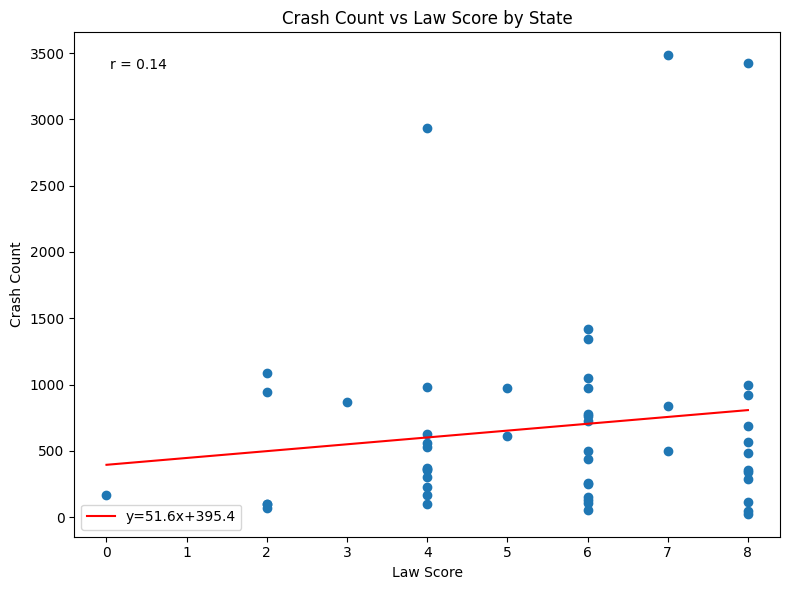

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Get the names of all columns that store law types
law_cols = [c for c in merged_full_with_gender.columns if c.endswith('_law_type')]
# Simple encoder function: Primary = 2, Secondary = 1, None/Other = 0
def encode(v):
    if v == 'Primary': return 2
    elif v == 'Secondary': return 1
    else: return 0
# Apply the encoding to each law column and create new '_score' columns
for col in law_cols:
    merged_full_with_gender[col + '_score'] = merged_full_with_gender[col].apply(encode)
merged_full_with_gender['law_score'] = merged_full_with_gender[[c + '_score' for c in law_cols]].sum(axis=1)
# Group by state to get one law_score (same across the state) and crash count
state_stats = (
    merged_full_with_gender.groupby('state_name')
      .agg(law_score=('law_score','first'),
           crash_count=('number_of_fatalities','size'))
      .reset_index()
)
# Extract law scores and crash counts as NumPy arrays for regression
x = state_stats['law_score'].values
y = state_stats['crash_count'].values
# Fit a simple linear regression line (least squares)
slope, intercept = np.polyfit(x, y, 1)
# Calculate correlation coefficient (r) to see strength of the relationship
r = np.corrcoef(x, y)[0,1]
# Scatter plot: each state as a point
plt.figure(figsize=(8,6))
plt.scatter(x, y)
# Plot the regression line
x_line = np.array([x.min(), x.max()])
plt.plot(x_line, intercept + slope*x_line, color='red', label=f'y={slope:.1f}x+{intercept:.1f}')
# Label the axes and add a title
plt.xlabel('Law Score')
plt.ylabel('Crash Count')
plt.title('Crash Count vs Law Score by State')
# Show the correlation coefficient in the corner of the plot
plt.text(0.05, 0.95, f'r = {r:.2f}', transform=plt.gca().transAxes, va='top')
# Add legend and adjust layout
plt.legend()
plt.tight_layout()
plt.show()


# **5.National Distribution of Fatalities by Gender and Age Group**

###***Intent of the Plot:***

######To compare estimated traffic fatalities across different age groups and genders at the national level.

### ***Description of the Plot:***

######Three age groups—youth (less than 30), middle age (30–60), and seniors (above 60)—are shown by side-by-side bars for male (blue) and female (orange) deaths in this grouped bar chart.

### ***Interpretation:***

######Middle-aged individuals account for the highest estimated fatalities for both genders, with nearly equal numbers for males and females. Among seniors, females have slightly more estimated fatalities, while the youth group shows nearly balanced but slightly higher male fatalities. This suggests middle-aged adults are the most vulnerable group in terms of traffic-related deaths, likely due to their higher representation in the driving population.

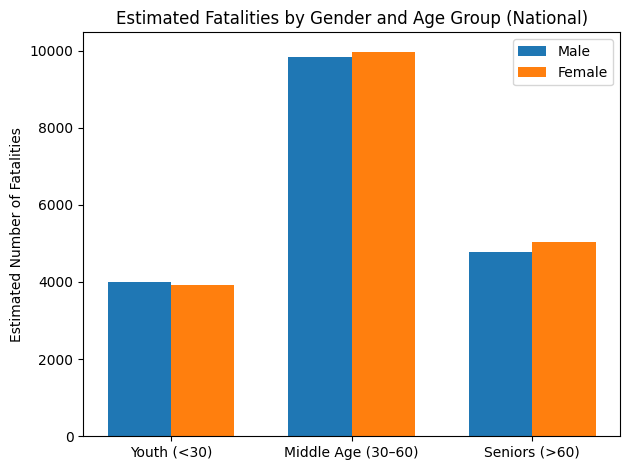

In [ ]:
# Define age groups and how they'll be labeled in the chart
age_groups = ['youth', 'middle_age', 'seniors']
labels = ['Youth (<30)', 'Middle Age (30–60)', 'Seniors (>60)']

# Calculate total male population in each age group
pop_male = [merged_full_with_gender[f'{grp}_M'].sum() for grp in age_groups]
# Do the same for females
pop_female = [merged_full_with_gender[f'{grp}_F'].sum() for grp in age_groups]

# Get the total population (male + female) across all age groups
total_pop = sum(pop_male) + sum(pop_female)

# Get the total number of fatalities in the dataset
total_fatalities = merged_full_with_gender['number_of_fatalities'].sum()

# Estimate fatalities by gender and age group using proportional population
fatal_male = [round(total_fatalities * pop / total_pop) for pop in pop_male]
fatal_female = [round(total_fatalities * pop / total_pop) for pop in pop_female]


# Start building the bar chart
fig, ax = plt.subplots()
x = range(len(labels))
width = 0.35

# Plot male bars to the left of each group position
ax.bar([i - width/2 for i in x], fatal_male, width, label='Male')
# Plot female bars to the right of each group position
ax.bar([i + width/2 for i in x], fatal_female, width, label='Female')
# Add age group labels to x-axis
ax.set_xticks(x)
ax.set_xticklabels(labels)
# Add axis labels and chart title
ax.set_ylabel('Estimated Number of Fatalities')
ax.set_title('Estimated Fatalities by Gender and Age Group (National)')
ax.legend()

plt.tight_layout()
plt.show()


# **6.Gender-Based Fatality Patterns Across the Top 5 States**

### ***Intent of the Plot:***

######To highlight the top 5 U.S. states where the estimated male-to-female fatality ratio is highest, showcasing potential gender-based differences in traffic-related deaths.

### ***Description of the Plot:***

######This grouped bar chart compares estimated fatalities between males and females for five states with the largest male/female fatality ratio. Each state has two bars: one for male fatalities (blue) and one for female (orange).


### ***Interpretation:***

######Male drivers may be more likely to be involved in fatal crashes in states like Tennessee and Colorado, where predicted male fatalities are significantly greater than female fatalities. Variations in risk-taking behavior, driving exposure, and other demographic factors may have an impact on this.

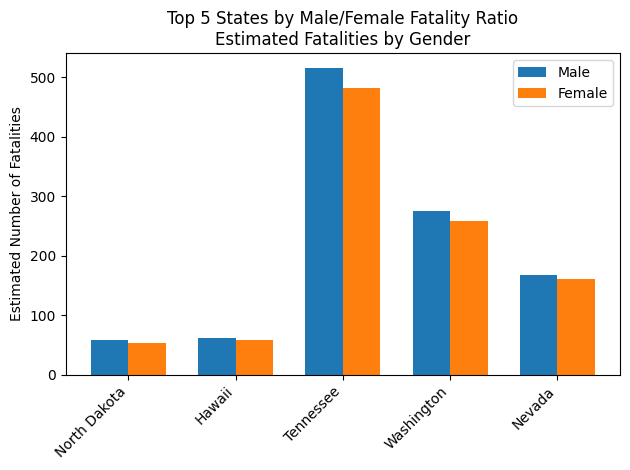

In [ ]:
# Calculate total fatalities per state
fatalities = merged_full_with_gender.groupby('state_name')['number_of_fatalities'].sum()

# Get total male and female populations per state (same across rows, so we take the first)
pop_male   = merged_full_with_gender.groupby('state_name')['TOTAL_M'].first()
pop_female = merged_full_with_gender.groupby('state_name')['TOTAL_F'].first()

# Estimate male fatalities proportionally based on population share
est_male   = fatalities * (pop_male   / (pop_male   + pop_female))
# Estimate female fatalities the same way
est_female = fatalities * (pop_female / (pop_male   + pop_female))
# Compute male-to-female fatality ratio for each state
ratio = est_male / est_female
# Get the top 5 states where the male/female fatality ratio is highest
top_states = ratio.sort_values(ascending=False).head(5).index.tolist()
# Extract estimated fatality values for these top states
male_vals   = [est_male[state]   for state in top_states]
female_vals = [est_female[state] for state in top_states]
# Create a grouped bar chart to compare male vs female estimated fatalities
fig, ax = plt.subplots()
x = range(len(top_states))
width = 0.35
# Plot bars for male fatalities (left side of each pair)
ax.bar([i - width/2 for i in x], male_vals, width, label='Male')
# Plot bars for female fatalities (right side of each pair)
ax.bar([i + width/2 for i in x], female_vals, width, label='Female')
# Customize x-axis with state names
ax.set_xticks(x)
ax.set_xticklabels(top_states, rotation=45, ha='right')
# Add y-label and chart title
ax.set_ylabel('Estimated Number of Fatalities')
ax.set_title('Top 5 States by Male/Female Fatality Ratio\nEstimated Fatalities by Gender')

# Add legend and clean up layout
ax.legend()

plt.tight_layout()
plt.show()


# **7.Top States with Highest Fatalities: Gender-Based Comparison**

### ***Intent of the Plot:***

######To show the gender distribution of traffic fatalities in the 5 states with the highest overall fatality counts.

### ***Description of the Plot:***

######The chart presents grouped bars for each of the top 5 states (Texas, California, Florida, Georgia, and North Carolina), comparing estimated male and female fatalities. Each state has two bars: one for males (blue) and one for females (orange).

### ***Interpretation:***

######All five states show relatively balanced fatality estimates between genders, with minor variations. Notably, in states like Texas and California, female fatalities slightly exceed male ones, while in California the opposite is true. These insights help contextualize gender patterns in the most crash-affected states.

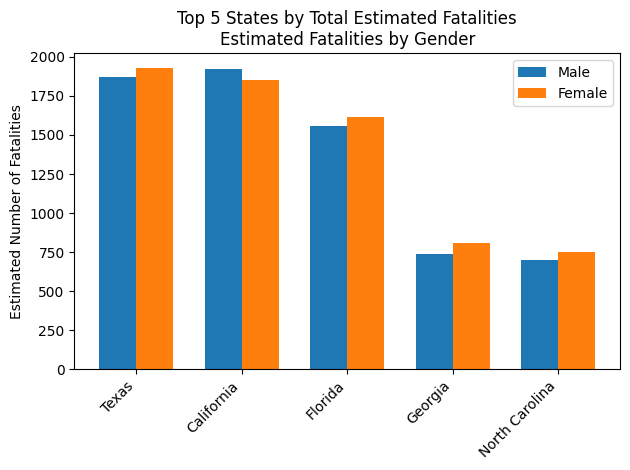

In [ ]:
# Calculate total fatalities per state
fatalities = merged_full_with_gender.groupby('state_name')['number_of_fatalities'].sum()

# Get total male and female population per state (same value across all rows, so we just take the first)
pop_male   = merged_full_with_gender.groupby('state_name')['TOTAL_M'].first()
pop_female = merged_full_with_gender.groupby('state_name')['TOTAL_F'].first()

# Estimate male fatalities based on their share of the population
est_male   = fatalities * (pop_male   / (pop_male   + pop_female))
# Same logic for estimated female fatalities
est_female = fatalities * (pop_female / (pop_male   + pop_female))

# Total estimated fatalities per state (male + female)
total_est = est_male + est_female

# Get the 5 states with the highest estimated total fatalities
top_states = total_est.sort_values(ascending=False).head(5).index.tolist()

# Pull estimated male and female fatality values for those top states
male_vals   = [est_male[state]   for state in top_states]
female_vals = [est_female[state] for state in top_states]

# Start plotting the grouped bar chart
fig, ax = plt.subplots()
x = range(len(top_states))
width = 0.35

# Plot male bars on the left of each group
ax.bar([i - width/2 for i in x], male_vals, width, label='Male')
# Plot female bars on the right
ax.bar([i + width/2 for i in x], female_vals, width, label='Female')

# Set x-axis labels to state names and rotate for readability
ax.set_xticks(x)
ax.set_xticklabels(top_states, rotation=45, ha='right')
# Add axis label and chart title
ax.set_ylabel('Estimated Number of Fatalities')
ax.set_title('Top 5 States by Total Estimated Fatalities\nEstimated Fatalities by Gender')


# Show legend and tidy up layout
ax.legend()

plt.tight_layout()
plt.show()


### ***Intent of the Plot:***

######To examine whether an increased male-to-female population ratio in a state is associated with a higher number of traffic fatalities.

### ***Description of the Plot:***

######Each point on the scatter plot represents a U.S. state, with the x-axis showing the male/female population ratio and the y-axis showing total fatalities. A regression line is included, along with the correlation coefficient (r = -0.13) and p-value (p = 0.366), which are displayed in the title.


### ***Interpretation:***

######The weak negative correlation (r = -0.13) and high p-value (p = 0.366) suggest there is no statistically significant relationship between a state’s gender ratio and total fatalities. In other words, having more males than females in the population does not appear to meaningfully affect the total number of crash-related deaths.

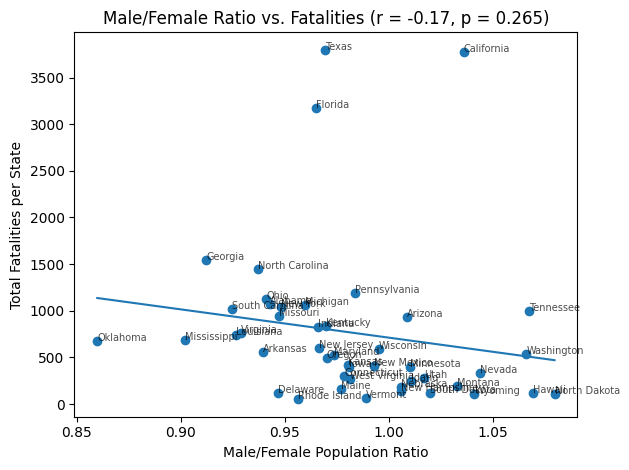

In [ ]:
from scipy.stats import pearsonr

# Total number of fatalities for each state
fatalities = merged_full_with_gender.groupby('state_name')['number_of_fatalities'].sum()

# Get total male and female population per state (first value since it’s consistent across rows)
pop_male = merged_full_with_gender.groupby('state_name')['TOTAL_M'].first()
pop_female = merged_full_with_gender.groupby('state_name')['TOTAL_F'].first()

# Calculate the male-to-female population ratio for each state
ratio = pop_male / pop_female

# Combine both series into a single DataFrame and drop any missing data
data = pd.DataFrame({
    'ratio': ratio,
    'fatalities': fatalities
}).dropna()

# Calculate Pearson correlation between population ratio and total fatalities
corr, p_value = pearsonr(data['ratio'], data['fatalities'])

# Fit a linear regression line to visualize the trend
slope, intercept = np.polyfit(data['ratio'], data['fatalities'], 1)
x_vals = np.linspace(data['ratio'].min(), data['ratio'].max(), 100)
y_vals = slope * x_vals + intercept

# Start plotting: scatter of ratio vs fatalities
plt.figure()
plt.scatter(data['ratio'], data['fatalities'])

# Plot the regression line on top of the scatter plot
plt.plot(x_vals, y_vals)

# Label the axes and add a title with correlation and p-value
plt.xlabel('Male/Female Population Ratio')
plt.ylabel('Total Fatalities per State')
plt.title(f'Male/Female Ratio vs. Fatalities (r = {corr:.2f}, p = {p_value:.3f})')

# Annotate each point with the state name
for state, row in data.iterrows():
    plt.text(row['ratio'], row['fatalities'], state, fontsize=7, alpha=0.7)

# Final layout adjustments
plt.tight_layout()
plt.show()


### ***Intent of the Plot***

######To determine whether the number of registered drivers in a state is a significant predictor of total traffic fatalities.

### ***Description of the Plot:***

######Each dot in the scatter plot represents a U.S. state, with the x-axis showing the number of registered drivers and the y-axis showing total fatalities. The chart includes a black linear regression line, along with the correlation coefficient (r = 0.92) and p-value (p = 0.000) displayed in the title.


### ***Interpretation:***

######There is a very strong positive correlation (r = 0.92, p < 0.001) between the number of registered drivers and total fatalities. This suggests that states with larger driver populations naturally experience more fatalities, likely due to increased vehicle exposure, congestion, and risk levels. Population size is a strong factor in interpreting raw fatality counts.

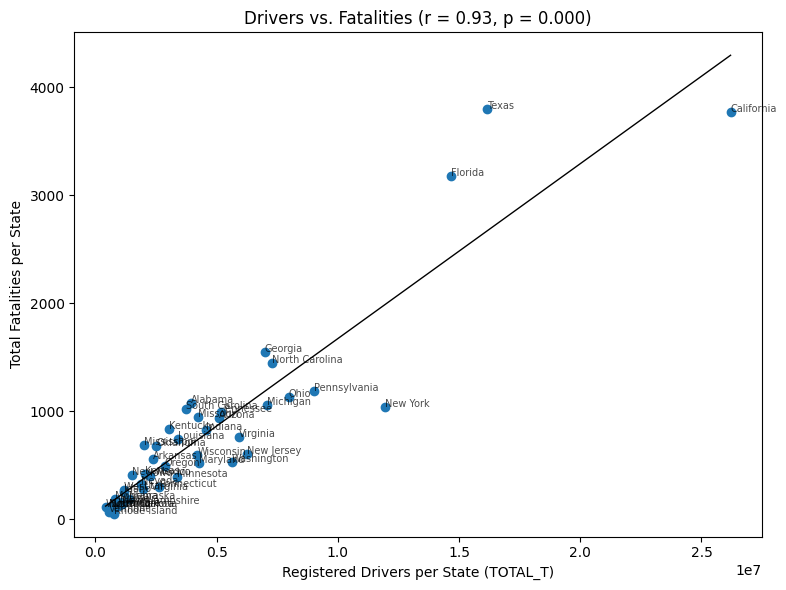

In [ ]:
from scipy.stats import pearsonr


drivers = merged_full_with_gender.groupby('state_name')['TOTAL_T'].first()
fatalities = merged_full_with_gender.groupby('state_name')['number_of_fatalities'].sum()

data = pd.DataFrame({
    'drivers': drivers,
    'fatalities': fatalities
}).dropna()

corr, p_value = pearsonr(data['drivers'], data['fatalities'])

slope, intercept = np.polyfit(data['drivers'], data['fatalities'], 1)
x_vals = np.linspace(data['drivers'].min(), data['drivers'].max(), 100)
y_vals = slope * x_vals + intercept

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(data['drivers'], data['fatalities'])
ax.plot(x_vals, y_vals, color='black', linewidth=1)

ax.set_xlabel('Registered Drivers per State (TOTAL_T)')
ax.set_ylabel('Total Fatalities per State')
ax.set_title(f'Drivers vs. Fatalities (r = {corr:.2f}, p = {p_value:.3f})')

for state, row in data.iterrows():
    ax.text(row['drivers'], row['fatalities'], state, fontsize=7, alpha=0.7)

plt.tight_layout()
plt.show()


### ***Intent of the Plot:***
######To investigate whether higher infrastructure spending per mile is associated with lower fatality counts, and whether this varies by road type (e.g., Local, Minor Arterial).

### ***Description of the Plot:***

######This multi-line chart shows how total fatalities change across different expenditure-per-mile bins for five types of functional road systems. Each line represents a road type, showing fatalities across spending levels.

### ***Interpretation:***

######The plot suggests that local and major collector roads experience more fatalities in lower spending ranges, possibly due to poorer infrastructure or maintenance. Interestingly, higher expenditures do not always correlate with lower fatalities—particularly for Minor Arterial roads, which show a spike in fatalities at mid-level expenditures. This highlights that simply increasing spending does not guarantee improved safety unless strategically applied.

<ipython-input-474-ce41c1ef6f67>:51: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-474-ce41c1ef6f67>:58: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-474-ce41c1ef6f67>:65: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



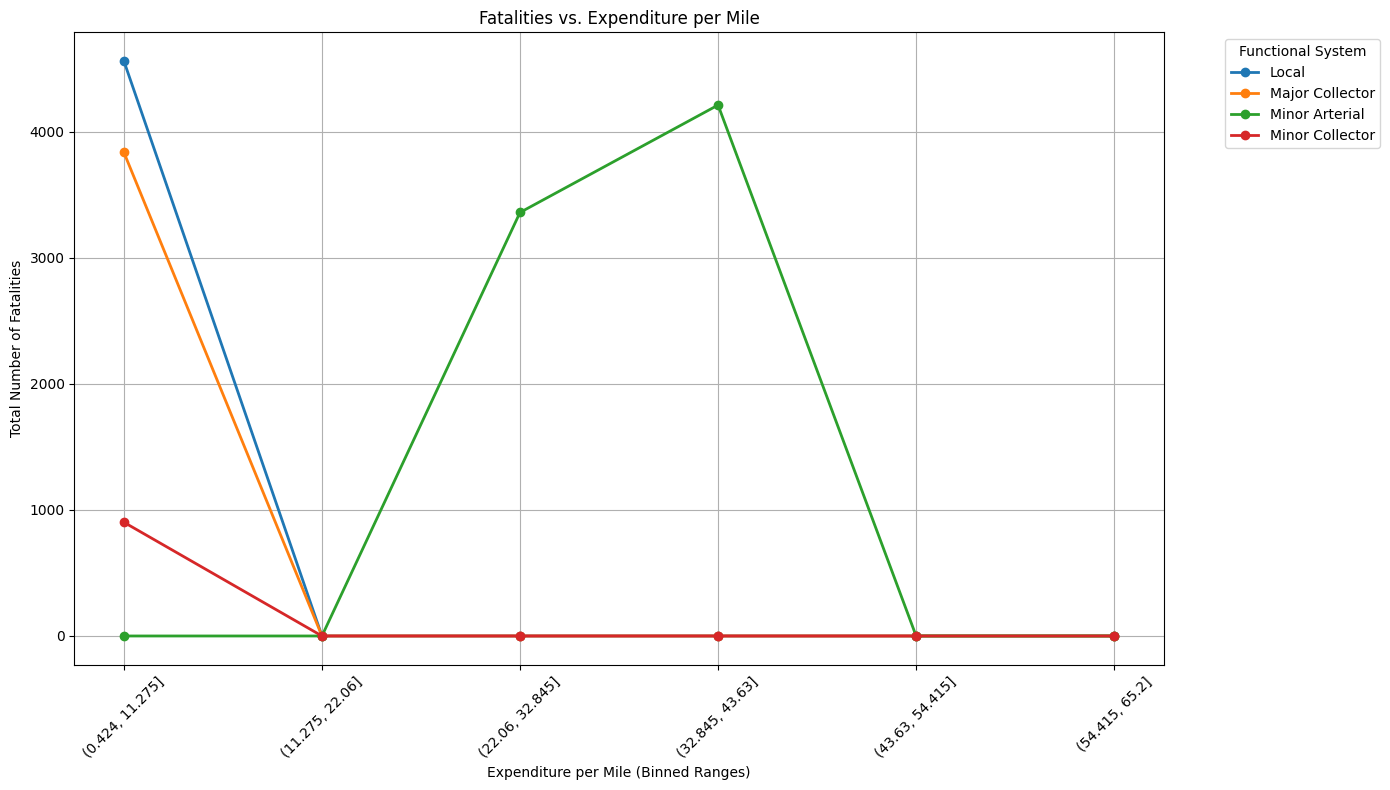

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

cols_to_numeric = ['mileage', 'U.S. Total_Total Cost']
for c in cols_to_numeric:
    merged_full_with_gender[c] = (
        merged_full_with_gender[c]
          .astype(str)
          .str.replace(r'[^\d.\-]', '', regex=True)
          .replace('', pd.NA)
          .pipe(pd.to_numeric, errors='coerce')
    )


mask = (
    ~merged_full_with_gender['functional_system_name']
        .isin(['Interstate', 'Unknown', 'Not Reported']) &
    merged_full_with_gender['mileage'].gt(0) &
    merged_full_with_gender['U.S. Total_Total Cost'].gt(0)
)
df_cleaned = merged_full_with_gender.loc[mask].copy()

if df_cleaned.empty:
    raise ValueError("No data left after filtering – check your filters.")


df_cleaned['expenditure_per_mile'] = (
    df_cleaned['U.S. Total_Total Cost'] / df_cleaned['mileage']
)

df_cleaned['expenditure_bin'] = pd.cut(
    df_cleaned['expenditure_per_mile'],
    bins=6,
    include_lowest=True
)


pa_mask = df_cleaned['functional_system_name'] == 'Principal Arterial – Other'
pa_grouped = (
    df_cleaned.loc[pa_mask]
      .groupby('expenditure_bin')['number_of_fatalities']
      .sum()
)
if not pa_grouped.empty:
    outlier_bin = pa_grouped.idxmax()
    df_cleaned = df_cleaned[~(pa_mask & (df_cleaned['expenditure_bin'] == outlier_bin))]

df_final = df_cleaned[~pa_mask]


grouped = (
    df_final
      .groupby(['expenditure_bin', 'functional_system_name'])['number_of_fatalities']
      .sum()
      .reset_index()
)
pivot = grouped.pivot(
    index='expenditure_bin',
    columns='functional_system_name',
    values='number_of_fatalities'
).fillna(0)

plt.figure(figsize=(14, 8))
for road_type in pivot.columns:
    plt.plot(
        pivot.index.astype(str),
        pivot[road_type],
        marker='o',
        linewidth=2,
        label=road_type
    )

plt.title("Fatalities vs. Expenditure per Mile")
plt.xlabel("Expenditure per Mile (Binned Ranges)")
plt.ylabel("Total Number of Fatalities")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Functional System", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


***Hypothesis testing***

In [ ]:
from scipy.stats import ttest_ind



daylight_group = merged_full_with_gender[merged_full_with_gender['light_condition_name'] == 'Daylight']['number_of_persons_in_accidents']
non_daylight_group = merged_full_with_gender[merged_full_with_gender['light_condition_name'] != 'Daylight']['number_of_persons_in_accidents']

t_stat, p_val = ttest_ind(non_daylight_group, daylight_group, equal_var=False)

p_val_one_tailed = p_val / 2 if t_stat > 0 else 1 - (p_val / 2)

alpha = 0.05
decision = (
    "Reject H₀: Crashes in non-daylight are significantly more injurious."
    if (p_val_one_tailed < alpha and t_stat > 0)
    else "Fail to reject H₀: No significant evidence that non-daylight crashes are more injurious."
)

(t_stat, p_val_one_tailed, decision)


(np.float64(-12.249289288599346),
 np.float64(1.0),
 'Fail to reject H₀: No significant evidence that non-daylight crashes are more injurious.')

In [ ]:
from scipy.stats import ttest_ind


group_sober = merged_full_with_gender[merged_full_with_gender['number_of_drunk_drivers'] == 0]['number_of_fatalities']
group_drunk = merged_full_with_gender[merged_full_with_gender['number_of_drunk_drivers'] >= 1]['number_of_fatalities']

t_stat, p_val = ttest_ind(group_drunk, group_sober, equal_var=False)

p_val_one_tailed = p_val / 2 if t_stat > 0 else 1 - (p_val / 2)

alpha = 0.05
if p_val_one_tailed < alpha and t_stat > 0:
    decision = "Reject H₀: Alcohol involvement is significantly associated with deadlier crashes."
else:
    decision = " Fail to reject H₀: No significant evidence that alcohol-related crashes are deadlier."

(t_stat, p_val_one_tailed, decision)


(np.float64(8.364384816396653),
 np.float64(3.291705956232975e-17),
 'Reject H₀: Alcohol involvement is significantly associated with deadlier crashes.')

In [ ]:
from scipy.stats import ttest_ind



holiday_group = merged_full_with_gender[merged_full_with_gender['is_holiday'] == True]['number_of_fatalities']
non_holiday_group = merged_full_with_gender[merged_full_with_gender['is_holiday'] == False]['number_of_fatalities']

t_stat, p_val = ttest_ind(holiday_group, non_holiday_group, equal_var=False)

p_val_one_tailed = p_val / 2 if t_stat > 0 else 1 - (p_val / 2)

alpha = 0.05

if p_val_one_tailed < alpha and t_stat > 0:
    decision = " Reject H₀: Crashes on holidays are significantly more deadly on average."
else:
    decision = "Fail to reject H₀: No significant evidence that holiday crashes are deadlier."


print(f"T-statistic: {t_stat:.4f} — tells us how different the two group means are.")
print(f"One-tailed p-value: {p_val_one_tailed:.4f} — probability of seeing this result if H₀ is true.")
print(f" Alpha (significance level): {alpha}")

print(decision)


T-statistic: -0.0249 — tells us how different the two group means are.
One-tailed p-value: 0.5099 — probability of seeing this result if H₀ is true.
 Alpha (significance level): 0.05
Fail to reject H₀: No significant evidence that holiday crashes are deadlier.


In [ ]:
df_clean = merged_full_with_gender[merged_full_with_gender['functional_system_name'].isin(['Principal Arterial – Other', 'Minor Arterial']) ]

group_principal = df_clean[df_clean['functional_system_name'] == 'Principal Arterial – Other']['number_of_fatalities']
group_minor = df_clean[df_clean['functional_system_name'] == 'Minor Arterial']['number_of_fatalities']


t_stat, p_val = ttest_ind(group_principal, group_minor, equal_var=False)
p_val_one_tailed = p_val / 2 if t_stat > 0 else 1 - (p_val / 2)


alpha = 0.05
if p_val_one_tailed < alpha and t_stat > 0:
    decision = "Reject H₀: Principal Arterial crashes are significantly deadlier than Minor Arterial crashes."
else:
    decision = "Fail to reject H₀: No significant evidence that Principal Arterial crashes are deadlier."


{
    "T-statistic": round(t_stat, 4),
    "One-tailed p-value": round(p_val_one_tailed, 4),
    "Alpha (significance level)": alpha,
    "Decision": decision
}

{'T-statistic': np.float64(2.159),
 'One-tailed p-value': np.float64(0.0154),
 'Alpha (significance level)': 0.05,
 'Decision': 'Reject H₀: Principal Arterial crashes are significantly deadlier than Minor Arterial crashes.'}

In [ ]:
from scipy.stats import ttest_ind

fatalities_with_ban = []
fatalities_without_ban = []

for i in range(len(merged_full_with_gender)):
    if merged_full_with_gender.iloc[i]['hand-held_ban_flag'] == "Yes":
        fatalities_with_ban.append(merged_full_with_gender.iloc[i]['number_of_fatalities'])
    elif merged_full_with_gender.iloc[i]['hand-held_ban_flag'] == "No":
        fatalities_without_ban.append(merged_full_with_gender.iloc[i]['number_of_fatalities'])

t_stat, p_val = ttest_ind(fatalities_with_ban, fatalities_without_ban, equal_var=False)

if t_stat < 0:
    p_val_one_tailed = p_val / 2
else:
    p_val_one_tailed = 1 - (p_val / 2)

alpha = 0.05
if p_val_one_tailed < alpha and t_stat < 0:
    decision = " Reject H₀: Crashes are significantly less deadly in states with hand-held phone bans."
else:
    decision = "Fail to reject H₀: No significant evidence that phone bans reduce fatalities."

{
    "T-statistic": round(t_stat, 4),
    "One-tailed p-value": round(p_val_one_tailed, 4),
    "Alpha": alpha,
    "Decision": decision
}


{'T-statistic': np.float64(-1.9789),
 'One-tailed p-value': np.float64(0.0239),
 'Alpha': 0.05,
 'Decision': ' Reject H₀: Crashes are significantly less deadly in states with hand-held phone bans.'}